In [101]:
# imports go here
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

---
#### CS 260 Database and Data Visualizsation - Final Project - SP24
---

# The Top 120 NBA Points Per Game Leaders for Every 5 Years from 1970

### By: Andrew Presta and Julian Memis


---

## 1. Introduction

Research question: How important are 3-pointers to the NBA?

For this project, our group explored the NBA over the years. More specifically, we wanted to figure out just how important 3-pointers are to the NBA in recent years and what might have happened in history that could have altered the way the NBA is played.

In the NBA, players can take either a 2-pointer or a 3-pointer. These two shots count towards a players field goals, so that the number of field goals attempted for each players is the sum of 2-pointers and 3-pointers. There is also a 1-pointer in basketball also known as a free throw, which we didn't get much into in our analysis.

Throughout our research, we created 10 graphs that all have some relation to 3-pointers to figure out how important 3-pointers are to the NBA. Our dataset consists of 32 columns and 1440 rows and we used the following variables in our analysis: player, year, position, 3-pointers attempted (3PA), 2-pointers attempted (2PA), points per game (PPG), field goals attempted (FGA), and effective field goal percentage (EFG%).

To figure out the importance of 3-pointers in the NBA, we asked 3 questions.

The first question was what range of field goals attempted and 3-pointers attempted do most players fall under? We found that in the 2023 season, most players shot about 3-8 3-pointers per game and attempted about 8-19 field goals per game. In the years before 2023, most players shot about 0-5 3-pointers per game and attempted about 7-15 field goals per game.

The second question was are players shooting more 3-pointers per game over the years? We found that players are indeed shooting more 3-pointers per game over the years.

The final question was how does effective field goal percentage relate to 3-pointers? We found that 3-pointers are slightly more effective in recent years and might continue this trend.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.basketball-reference.com/leagues/

* The data was collected through Sportradar, the official stats partner of the NBA. The NBA records its data after every game, so they have information dating back to even the 40’s.


In [102]:
#In this cell, we load the data.
try:
    #load the csv data from github
    csv_data_fb = pd.read_csv("https://raw.githubusercontent.com/JulianMemis/CS260_Final_Project/main/Final%20Basketball.csv")
    csv_data_fb2024 = pd.read_csv("https://raw.githubusercontent.com/JulianMemis/CS260_Final_Project/main/2024%20Basketball%20rev.csv")

    #Connect to a database - change "example.db" to a database that makes sense for your data.
    conn = sql.connect('nba.db')

    #Load the csv data into a table using the connection to the db
    csv_data_fb.to_sql('nba', conn, index = False)
    csv_data_fb2024.to_sql('nba_2024', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [103]:
#Show the rows of the nba table.
sql_statement = """
                   SELECT *
                   FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,rk,player,pos,age,team,games,games_started,min_played,made_fg,fg_attempted,...,def_reb,tot_reb,assists,steals,blocks,turnovers,fouls,points,player_additional,year
0,1,Kareem Abdul-Jabbar*,C,23,MIL,82,NaN,40.1,13.0,22.5,...,NaN,16.0,3.3,NaN,NaN,NaN,3.2,31.7,abdulka01,1970
1,2,John Havlicek*,SF,30,BOS,81,NaN,45.4,11.0,24.5,...,NaN,9.0,7.5,NaN,NaN,NaN,2.5,28.9,havlijo01,1970
2,3,Elvin Hayes*,C,25,SDR,82,NaN,44.3,11.6,27.0,...,NaN,16.6,2.3,NaN,NaN,NaN,2.7,28.7,hayesel01,1970
3,4,Dave Bing*,PG,27,DET,82,NaN,37.4,9.7,20.9,...,NaN,4.4,5.0,NaN,NaN,NaN,2.8,27.0,bingda01,1970
4,5,Lou Hudson*,SF,26,ATL,76,NaN,41.0,10.9,22.5,...,NaN,5.1,3.4,NaN,NaN,NaN,2.4,26.8,hudsolo01,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,Marcus Morris,PF,33,LAC,65,65.0,28.1,4.2,9.9,...,3.5,4.0,1.8,0.6,0.3,0.9,2.1,11.2,morrima03,2023
1436,1437,Corey Kispert,SF,23,WAS,74,45.0,28.3,3.9,7.9,...,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1,kispeco01,2023
1437,1438,Kentavious Caldwell-Pope,SG,29,DEN,76,76.0,31.3,3.8,8.3,...,2.3,2.7,2.4,1.5,0.5,1.1,1.9,10.8,caldwke01,2023
1438,1439,Jaylen Nowell,SG,23,MIN,65,2.0,19.3,4.3,9.6,...,2.1,2.6,2.0,0.6,0.1,1.0,1.6,10.8,nowelja01,2023


In [104]:
#Show the rows of the nba_2024 table.
sql_statement = """
                   SELECT *
                   FROM nba_2024
                """

results = pd.read_sql_query(sql_statement, conn)
results

,rk,player,pos,age,team,games,games_started,min_played,made_fg,fg_attempted,...,def_reb,tot_reb,assists,steals,blocks,turnovers,fouls,points,player_additional,year
0,1,Luka Dončić,PG,24,DAL,70,70,37.5,11.5,23.6,...,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,doncilu01,2024
1,2,Giannis Antetokounmpo,PF,29,MIL,73,73,35.2,11.5,18.8,...,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,antetgi01,2024
2,3,Shai Gilgeous-Alexander,PG,25,OKC,75,75,34.0,10.6,19.8,...,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,gilgesh01,2024
3,4,Jalen Brunson,PG,27,NYK,77,77,35.4,10.3,21.4,...,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,brunsja01,2024
4,5,Devin Booker,PG,27,PHO,68,68,36.0,9.4,19.2,...,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,bookede01,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Malik Beasley,SG,27,MIL,79,77,29.6,4.1,9.1,...,3.2,3.7,1.4,0.7,0.1,0.7,2.0,11.3,beaslma01,2024
116,117,Zach Collins,C,26,SAS,69,29,22.1,4.3,8.9,...,3.7,5.4,2.8,0.5,0.8,1.9,3.0,11.2,colliza01,2024
117,118,Russell Westbrook,PG,35,LAC,68,11,22.5,4.4,9.8,...,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1,westbru01,2024
118,119,Daniel Gafford,C-PF,25,TOT,74,66,24.5,4.7,6.5,...,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,gaffoda01,2024


### 2.1 Summary of Variables within the nba Table

The nba table has 32 columns/variables and 1440 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "nba" (
	"rk"	INTEGER,
	"player"	TEXT,
	"pos"	TEXT,
	"age"	INTEGER,
	"tm"	TEXT,
	"games"	INTEGER,
	"games_started"	INTEGER,
	"min_played"	REAL,
	"made_fg"	REAL,
	"fg_attempted"	REAL,
	"fg_perc"	REAL,
	"made_3p"	REAL,
	"attempted_3p"	REAL,
	"perc_3p"	REAL,
	"made_2p"	REAL,
	"attempted_2p"	REAL,
	"perc_2p"	REAL,
	"effective_fg_perc"	REAL,
	"made_ft"	REAL,
	"attempted_ft"	REAL,
	"ft_perc"	REAL,
	"off_reb"	REAL,
	"def_reb"	REAL,
	"tot_reb"	REAL,
	"assists"	REAL,
	"steals"	REAL,
	"blocks"	REAL,
	"turnovers"	REAL,
	"fouls"	REAL,
	"points"	REAL,
	"player_additional"	TEXT,
	"year"	INTEGER,
	PRIMARY KEY("rk")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

**CATEGORICAL VARIABLES**

* **player** – The name of the player
    * Number of missing values: 0
    * Contains 972 distinct values:
        * Michael Jordan, Nikola Jokic, Kevin Durant, etc.
        * Describes the name of each player  
* **pos** – The position of the player
    * Number of missing values: 0
    * Contains 12 distinct values:
        * C - center
        * SF - small forward
        * PG - point guard
        * PF - power forward
        * SG - shooting guard
        * SF-SG - small forward primary; shooting guard secondary
        * C-PF - center primary; power forward secondary
        * SG-SF - shooting guard primary; small forward primary
        * PG-SG - point guard primary; shooting guard secondary
        * SF-PF - small forward primary; power forward secondary
        * PF-SF - power forward primary; small forward secondary
        * SG-PG - shooting guard primary; point guard secondary
* **team** – The team of the player
    * Number of missing values: 0
    * Contains 47 distinct values:
        * BOS, MIL, CHI, PHI, etc.
        * Describes the abbreviation of the team the player played for during that year
* **player_additional** – The unique code of the player
    * Number of missing values: 0
    * Contains 975 distinct values:
        *  Generally gives the player's last name, then first couple letter of their first name, then a number. (Elvin Hayes: hayesel01)

**QUANTITATIVE  DISCRETE VARIABLES**

* **rk** – The id for each player. Also shows the rank they are in scoring grouped by every 120 players for every year in the dataset (ex. #121 is the #1 leading scorer for 1975, #242 is the #1 leading scorer for 1980)
    * Number of missing values: 0
    * max value: 1440
    * min value: 1
    * average value: 720.5
* **age** – The age of each player at the recorded time.
    * Number of missing values: 0
    * max value: 38
    * min value: 19
    * average value: 26.608333
* **games** – The number of games played that season.
    * Number of missing values: 0
    * max value: 86
    * min value: 51
    * average value: 76.047917
* **games_started** – The number of games started that season.
    * Number of missing values: 303
    * max value: 83
    * min value: 0
    * average value: 59.452067
* **year** – The starting year for that season.
    * Number of missing values: 0
    * max value: 2023
    * min value: 1970
    * average value: 1997.333333

**QUANTITATIVE  CONTINUOUS VARIABLES**

* **min_played** – The number of average minutes played that season for the player per game.
    * Number of missing values: 0
    * max value: 45.4
    * min value: 9.9
    * average value: 30.980139
* **made_fg** – The number of average field goals made that season for the player per game.
    * Number of missing values: 0
    * max value: 13.0
    * min value: 1.1
    * average value: 5.793889
* **fg_attempted** – The number of average field goals attempted that season for the player per game.
    * Number of missing values: 0
    * max value: 27.2
    * min value: 2.5
    * average value: 12.302778
* **fg_perc** – The number of average field goal percentage that season for the player.
    * Number of missing values: 0
    * max value: 0.705
    * min value: 0.358
    * average value: 0.471297
* **made_3p** – The number of average 3-pointers made that season for the player per game.
    * Number of missing values: 240
    * max value: 5.3
    * min value: 0.0
    * average value: 0.899167
* **attempted_3p** – The number of average 3-pointers attempted that season for the player per game.
    * Number of missing values: 240
    * max value: 12.7
    * min value: 0.0
    * average value: 2.46975
* **perc_3p** – The number of average 3-pointer percentage that season for the player.
    * Number of missing values: 278
    * max value: 0.6
    * min value: 0.0
    * average value: 0.284363
* **made_2p** – The number of average 2-pointers made that season for the player per game.
    * Number of missing values: 0
    * max value: 13.0
    * min value: 0.4
    * average value: 5.047153
* **attempted_2p** – The number of average 2-pointers attempted that season for the player per game.
    * Number of missing values: 0
    * max value: 27.0
    * min value: 0.9
    * average value: 10.24375
* **perc_2p** – The number of average 2-pointer percentage that season for the player.
    * Number of missing values: 0
    * max value: 0.708
    * min value: 0.354
    * average value: 0.492747
* **effective_fg_perc** – The number of effective field goal percentage that season for the player (3-pointers yield a higher efg% than 2-pointers).
    * Number of missing values: 0
    * max value: 0.705
    * min value: 0.366
    * average value: 0.501633
* **made_ft** – The number of average free throws made that season for the player per game.
    * Number of missing values: 0
    * max value: 10.0
    * min value: 0.3
    * average value: 3.008264
* **attempted_ft** – The number of average free throws attempted that season for the player per game.
    * Number of missing values: 0
    * max value: 13.1
    * min value: 0.5
    * average value: 3.874583
* **ft_perc** – The number of average free throw percentage that season for the player.
    * Number of missing values: 0
    * max value: 0.958
    * min value: 0.355
    * average value: 0.775147
* **off_reb** – The number of average offensive rebounds that season for the player per game.
    * Number of missing values: 120
    * max value: 5.9
    * min value: 0.1
    * average value: 1.470606
* **def_reb** – The number of average defensive rebounds that season for the player per game.
    * Number of missing values: 120
    * max value: 13.5
    * min value: 0.6
    * average value: 3.998788
* **tot_reb** – The number of average total rebounds that season for the player per game.
    * Number of missing values: 0
    * max value: 18.2
    * min value: 1.1
    * average value: 5.542083
* **assists** – The number of average assists that season for the player per game.
    * Number of missing values: 0
    * max value: 14.2
    * min value: 0.3
    * average value: 3.285694
* **steals** – The number of average steals that season for the player per game.
    * Number of missing values: 120
    * max value: 3.7
    * min value: 0.2
    * average value: 1.041439
* **blocks** – The number of average blocks that season for the player per game.
    * Number of missing values: 120
    * max value: 4.5
    * min value: 0.0
    * average value: 0.590303
* **turnovers** – The number of average turnovers that season for the player per game.
    * Number of missing values: 240
    * max value: 4.8
    * min value: 0.5
    * average value: 2.04675
* **fouls** – The number of average fouls that season for the player per game.
    * Number of missing values: 0
    * max value: 4.4
    * min value: 0.9
    * average value: 2.578681
* **points** – The number of average points that season for the player per game.
    * Number of missing values: 0
    * max value: 35.4
    * min value: 3.3
    * average value: 15.346875

### 2.2 Code used to Summarize Variables

In [105]:
#Get the distinct values in the player column
sql_statement = """
                    SELECT DISTINCT(player)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,player
0,Kareem Abdul-Jabbar*
1,John Havlicek*
2,Elvin Hayes*
3,Dave Bing*
4,Lou Hudson*
...,...
967,Max Strus
968,Quentin Grimes
969,Corey Kispert
970,Jaylen Nowell


In [106]:
#Get the number of missing values in the player column
sql_statement = """
                    SELECT COUNT(*)
                    FROM nba
                    WHERE player IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(*)
0,0


In [107]:
#Get the distinct values in the pos column
sql_statement = """
                    SELECT DISTINCT(pos)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,pos
0,C
1,SF
2,PG
3,PF
4,SG
5,SF-SG
6,C-PF
7,SG-SF
8,PG-SG
9,SF-PF


In [108]:
#Get the number of missing values in the pos column
sql_statement = """
                    SELECT COUNT(*)
                    FROM nba
                    WHERE pos IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(*)
0,0


In [109]:
#Get the distinct values in the team column
sql_statement = """
                    SELECT DISTINCT(team)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,team
0,MIL
1,BOS
2,SDR
3,DET
4,ATL
5,CHI
6,POR
7,PHI
8,CIN
9,PHO


In [110]:
#Get the number of missing values in the team column
sql_statement = """
                    SELECT COUNT(*)
                    FROM nba
                    WHERE team IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(*)
0,0


In [111]:
#Get the distinct values in the player_additional column
sql_statement = """
                    SELECT DISTINCT(player_additional)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,player_additional
0,abdulka01
1,havlijo01
2,hayesel01
3,bingda01
4,hudsolo01
...,...
970,strusma01
971,grimequ01
972,kispeco01
973,nowelja01


In [112]:
#Get the number of missing values in the player_additional column
sql_statement = """
                    SELECT COUNT(*)
                    FROM nba
                    WHERE player_additional IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(*)
0,0


In [113]:
#Get the distinct values in the rk column
sql_statement = """
                    SELECT DISTINCT(rk)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,rk
0,1
1,2
2,3
3,4
4,5
...,...
1435,1436
1436,1437
1437,1438
1438,1439


In [114]:
#Get the min, max, average, and number of missing values in the rk column
sql_statement = """
                    SELECT MAX(rk) AS max_rk,
                           MIN(rk) AS min_rk,
                           AVG(rk) AS avg_rk,
                           COUNT(*) - COUNT(rk) AS missing_rk_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_rk,min_rk,avg_rk,missing_rk_values
0,1440,1,720.5,0


In [115]:
#Get the distinct values in the age column
sql_statement = """
                    SELECT DISTINCT(age)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,age
0,23
1,30
2,25
3,27
4,26
5,28
6,22
7,29
8,24
9,34


In [116]:
#Get the min, max, average, and number of missing values in the age column
sql_statement = """
                    SELECT MAX(age) AS max_age,
                           MIN(age) AS min_age,
                           AVG(age) AS avg_age,
                           COUNT(*) - COUNT(age) AS missing_age_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_age,min_age,avg_age,missing_age_values
0,38,19,26.608333,0


In [117]:
#Get the distinct values in the games column
sql_statement = """
                    SELECT DISTINCT(games)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,games
0,82
1,81
2,76
3,80
4,75
5,71
6,73
7,78
8,79
9,74


In [118]:
#Get the min, max, average, and number of missing values in the games column
sql_statement = """
                    SELECT MAX(games) AS max_games,
                           MIN(games) AS min_games,
                           AVG(games) AS avg_games,
                           COUNT(*) - COUNT(games) AS missing_games_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_games,min_games,avg_games,missing_games_values
0,86,51,76.047917,0


In [119]:
#Get the distinct values in the games_started column
sql_statement = """
                    SELECT DISTINCT(games_started)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,games_started
0,NaN
1,80.0
2,82.0
3,69.0
4,70.0
...,...
80,41.0
81,56.0
82,32.0
83,24.0


In [120]:
#Get the min, max, average, and number of missing values in the games_started column
sql_statement = """
                    SELECT MAX(games_started) AS max_games_started,
                           MIN(games_started) AS min_games_started,
                           AVG(games_started) AS avg_games_started,
                           COUNT(*) - COUNT(games_started) AS missing_games_started_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_games_started,min_games_started,avg_games_started,missing_games_started_values
0,83.0,0.0,59.452067,303


In [121]:
#Get the distinct values in the year column
sql_statement = """
                    SELECT DISTINCT(year)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,year
0,1970
1,1975
2,1980
3,1985
4,1990
5,1995
6,2000
7,2005
8,2010
9,2015


In [122]:
#Get the min, max, average, and number of missing values in the year column
sql_statement = """
                    SELECT MAX(year) AS max_year,
                           MIN(year) AS min_year,
                           AVG(year) AS avg_year,
                           COUNT(*) - COUNT(year) AS missing_year_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_year,min_year,avg_year,missing_year_values
0,2023,1970,1997.333333,0


In [123]:
#Get the distinct values in the min_played column
sql_statement = """
                    SELECT DISTINCT(min_played)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_played
0,40.1
1,45.4
2,44.3
3,37.4
4,41.0
...,...
255,20.6
256,26.9
257,21.0
258,20.5


In [124]:
#Get the min, max, average, and number of missing values in the min_played column
sql_statement = """
                    SELECT MAX(min_played) AS max_min_played,
                           MIN(min_played) AS min_min_played,
                           AVG(min_played) AS avg_min_played,
                           COUNT(*) - COUNT(min_played) AS missing_min_played_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_min_played,min_min_played,avg_min_played,missing_min_played_values
0,45.4,9.9,30.980139,0


In [125]:
#Get the distinct values in the made_fg column
sql_statement = """
                    SELECT DISTINCT(made_fg)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,made_fg
0,13.0
1,11.0
2,11.6
3,9.7
4,10.9
...,...
99,10.7
100,10.2
101,12.2
102,11.3


In [126]:
#Get the min, max, average, and number of missing values in the made_fg column
sql_statement = """
                    SELECT MAX(made_fg) AS max_made_fg,
                           MIN(made_fg) AS min_made_fg,
                           AVG(made_fg) AS avg_made_fg,
                           COUNT(*) - COUNT(made_fg) AS missing_made_fg_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_made_fg,min_made_fg,avg_made_fg,missing_made_fg_values
0,13.0,1.1,5.793889,0


In [127]:
#Get the distinct values in the fg_attempted column
sql_statement = """
                    SELECT DISTINCT(fg_attempted)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,fg_attempted
0,22.5
1,24.5
2,27.0
3,20.9
4,21.1
...,...
184,23.0
185,18.0
186,20.6
187,17.2


In [128]:
#Get the min, max, average, and number of missing values in the fg_attempted column
sql_statement = """
                    SELECT MAX(fg_attempted) AS max_fg_attempted,
                           MIN(fg_attempted) AS min_fg_attempted,
                           AVG(fg_attempted) AS avg_fg_attempted,
                           COUNT(*) - COUNT(fg_attempted) AS missing_fg_attempted_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_fg_attempted,min_fg_attempted,avg_fg_attempted,missing_fg_attempted_values
0,27.2,2.5,12.302778,0


In [129]:
#Get the distinct values in the fg_perc column
sql_statement = """
                    SELECT DISTINCT(fg_perc)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,fg_perc
0,0.577
1,0.450
2,0.428
3,0.467
4,0.484
...,...
228,0.659
229,0.705
230,0.629
231,0.653


In [130]:
#Get the min, max, average, and number of missing values in the fg_perc column
sql_statement = """
                    SELECT MAX(fg_perc) AS max_fg_perc,
                           MIN(fg_perc) AS min_fg_perc,
                           AVG(fg_perc) AS avg_fg_perc,
                           COUNT(*) - COUNT(fg_perc) AS missing_fg_perc_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_fg_perc,min_fg_perc,avg_fg_perc,missing_fg_perc_values
0,0.705,0.358,0.471297,0


In [131]:
#Get the distinct values in the made_3p column
sql_statement = """
                    SELECT DISTINCT(made_3p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,made_3p
0,NaN
1,0.0
2,0.1
3,0.2
4,0.6
5,0.3
6,0.7
7,0.4
8,1.0
9,0.9


In [132]:
#Get the min, max, average, and number of missing values in the made_3p column
sql_statement = """
                    SELECT MAX(made_3p) AS max_made_3p,
                           MIN(made_3p) AS min_made_3p,
                           AVG(made_3p) AS avg_made_3p,
                           COUNT(*) - COUNT(made_3p) AS missing_made_3p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_made_3p,min_made_3p,avg_made_3p,missing_made_3p_values
0,5.3,0.0,0.899167,240


In [133]:
#Get the distinct values in the attempted_3p column
sql_statement = """
                    SELECT DISTINCT(attempted_3p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,attempted_3p
0,NaN
1,0.1
2,0.0
3,0.4
4,0.5
...,...
93,7.3
94,10.6
95,9.1
96,7.8


In [134]:
#Get the min, max, average, and number of missing values in the attempted_3p column
sql_statement = """
                    SELECT MAX(attempted_3p) AS max_attempted_3p,
                           MIN(attempted_3p) AS min_attempted_3p,
                           AVG(attempted_3p) AS avg_attempted_3p,
                           COUNT(*) - COUNT(attempted_3p) AS missing_attempted_3p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_attempted_3p,min_attempted_3p,avg_attempted_3p,missing_attempted_3p_values
0,12.7,0.0,2.46975,240


In [135]:
#Get the distinct values in the perc_3p column
sql_statement = """
                    SELECT DISTINCT(perc_3p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,perc_3p
0,NaN
1,0.286
2,0.333
3,0.257
4,0.000
...,...
255,0.471
256,0.275
257,0.307
258,0.434


In [136]:
#Get the min, max, average, and number of missing values in the perc_3p column
sql_statement = """
                    SELECT MAX(perc_3p) AS max_perc_3p,
                           MIN(perc_3p) AS min_perc_3p,
                           AVG(perc_3p) AS avg_perc_3p,
                           COUNT(*) - COUNT(perc_3p) AS missing_perc_3p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_perc_3p,min_perc_3p,avg_perc_3p,missing_perc_3p_values
0,0.6,0.0,0.284363,278


In [137]:
#Get the distinct values in the made_2p column
sql_statement = """
                    SELECT DISTINCT(made_2p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,made_2p
0,13.0
1,11.0
2,11.6
3,9.7
4,10.9
...,...
103,10.2
104,1.3
105,0.9
106,0.4


In [138]:
#Get the min, max, average, and number of missing values in the made_2p column
sql_statement = """
                    SELECT MAX(made_2p) AS max_made_2p,
                           MIN(made_2p) AS min_made_2p,
                           AVG(made_2p) AS avg_made_2p,
                           COUNT(*) - COUNT(made_2p) AS missing_made_2p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_made_2p,min_made_2p,avg_made_2p,missing_made_2p_values
0,13.0,0.4,5.047153,0


In [139]:
#Get the distinct values in the attempted_2p column
sql_statement = """
                    SELECT DISTINCT(attempted_2p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,attempted_2p
0,22.5
1,24.5
2,27.0
3,20.9
4,21.1
...,...
188,1.4
189,2.3
190,0.9
191,2.7


In [140]:
#Get the min, max, average, and number of missing values in the attempted_2p column
sql_statement = """
                    SELECT MAX(attempted_2p) AS max_attempted_2p,
                           MIN(attempted_2p) AS min_attempted_2p,
                           AVG(attempted_2p) AS avg_attempted_2p,
                           COUNT(*) - COUNT(attempted_2p) AS missing_attempted_2p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_attempted_2p,min_attempted_2p,avg_attempted_2p,missing_attempted_2p_values
0,27.0,0.9,10.24375,0


In [141]:
#Get the distinct values in the perc_2p column
sql_statement = """
                    SELECT DISTINCT(perc_2p)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,perc_2p
0,0.577
1,0.450
2,0.428
3,0.467
4,0.484
...,...
239,0.653
240,0.663
241,0.679
242,0.708


In [142]:
#Get the min, max, average, and number of missing values in the perc_2p column
sql_statement = """
                    SELECT MAX(perc_2p) AS max_perc_2p,
                           MIN(perc_2p) AS min_perc_2p,
                           AVG(perc_2p) AS avg_perc_2p,
                           COUNT(*) - COUNT(perc_2p) AS missing_perc_2p_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_perc_2p,min_perc_2p,avg_perc_2p,missing_perc_2p_values
0,0.708,0.354,0.492747,0


In [143]:
#Get the distinct values in the effective_fg_perc column
sql_statement = """
                    SELECT DISTINCT(effective_fg_perc)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,effective_fg_perc
0,0.577
1,0.450
2,0.428
3,0.467
4,0.484
...,...
234,0.591
235,0.653
236,0.599
237,0.637


In [144]:
#Get the min, max, average, and number of missing values in the effective_fg_perc column
sql_statement = """
                    SELECT MAX(effective_fg_perc) AS max_effective_fg_perc,
                           MIN(effective_fg_perc) AS min_effective_fg_perc,
                           AVG(effective_fg_perc) AS avg_effective_fg_perc,
                           COUNT(*) - COUNT(effective_fg_perc) AS missing_effective_fg_perc_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_effective_fg_perc,min_effective_fg_perc,avg_effective_fg_perc,missing_effective_fg_perc_values
0,0.705,0.366,0.501633,0


In [145]:
#Get the distinct values in the made_ft column
sql_statement = """
                    SELECT DISTINCT(made_ft)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,made_ft
0,5.7
1,6.8
2,5.5
3,7.5
4,5.0
...,...
82,7.7
83,6.9
84,10.0
85,7.8


In [146]:
#Get the min, max, average, and number of missing values in the made_ft column
sql_statement = """
                    SELECT MAX(made_ft) AS max_made_ft,
                           MIN(made_ft) AS min_made_ft,
                           AVG(made_ft) AS avg_made_ft,
                           COUNT(*) - COUNT(made_ft) AS missing_made_ft_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_made_ft,min_made_ft,avg_made_ft,missing_made_ft_values
0,10.0,0.3,3.008264,0


In [147]:
#Get the distinct values in the attempted_ft column
sql_statement = """
                    SELECT DISTINCT(attempted_ft)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,attempted_ft
0,8.3
1,8.4
2,8.2
3,9.4
4,6.6
...,...
96,11.7
97,9.6
98,10.9
99,12.3


In [148]:
#Get the min, max, average, and number of missing values in the attempted_ft column
sql_statement = """
                    SELECT MAX(attempted_ft) AS max_attempted_ft,
                           MIN(attempted_ft) AS min_attempted_ft,
                           AVG(attempted_ft) AS avg_attempted_ft,
                           COUNT(*) - COUNT(attempted_ft) AS missing_attempted_ft_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_attempted_ft,min_attempted_ft,avg_attempted_ft,missing_attempted_ft_values
0,13.1,0.5,3.874583,0


In [149]:
#Get the distinct values in the ft_perc column
sql_statement = """
                    SELECT DISTINCT(ft_perc)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,ft_perc
0,0.690
1,0.818
2,0.672
3,0.797
4,0.759
...,...
332,0.876
333,0.680
334,0.541
335,0.603


In [150]:
#Get the min, max, average, and number of missing values in the ft_perc column
sql_statement = """
                    SELECT MAX(ft_perc) AS max_ft_perc,
                           MIN(ft_perc) AS min_ft_perc,
                           AVG(ft_perc) AS avg_ft_perc,
                           COUNT(*) - COUNT(ft_perc) AS missing_ft_perc_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_ft_perc,min_ft_perc,avg_ft_perc,missing_ft_perc_values
0,0.958,0.355,0.775147,0


In [151]:
#Get the distinct values in the off_reb column
sql_statement = """
                    SELECT DISTINCT(off_reb)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,off_reb
0,NaN
1,3.1
2,3.3
3,0.7
4,0.9
5,1.5
6,3.4
7,1.3
8,3.7
9,2.3


In [152]:
#Get the min, max, average, and number of missing values in the off_reb column
sql_statement = """
                    SELECT MAX(off_reb) AS max_off_reb,
                           MIN(off_reb) AS min_off_reb,
                           AVG(off_reb) AS avg_off_reb,
                           COUNT(*) - COUNT(off_reb) AS missing_off_reb_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_off_reb,min_off_reb,avg_off_reb,missing_off_reb_values
0,5.9,0.1,1.470606,120


In [153]:
#Get the distinct values in the def_reb column
sql_statement = """
                    SELECT DISTINCT(def_reb)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,def_reb
0,NaN
1,9.3
2,13.5
3,4.1
4,1.9
...,...
94,10.7
95,9.1
96,10.3
97,9.6


In [154]:
#Get the min, max, average, and number of missing values in the def_reb column
sql_statement = """
                    SELECT MAX(def_reb) AS max_def_reb,
                           MIN(def_reb) AS min_def_reb,
                           AVG(def_reb) AS avg_def_reb,
                           COUNT(*) - COUNT(def_reb) AS missing_def_reb_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_def_reb,min_def_reb,avg_def_reb,missing_def_reb_values
0,13.5,0.6,3.998788,120


In [155]:
#Get the distinct values in the tot_reb column
sql_statement = """
                    SELECT DISTINCT(tot_reb)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,tot_reb
0,16.0
1,9.0
2,16.6
3,4.4
4,5.1
...,...
128,15.2
129,10.2
130,10.5
131,10.8


In [156]:
#Get the min, max, average, and number of missing values in the tot_reb column
sql_statement = """
                    SELECT MAX(tot_reb) AS max_tot_reb,
                           MIN(tot_reb) AS min_tot_reb,
                           AVG(tot_reb) AS avg_tot_reb,
                           COUNT(*) - COUNT(tot_reb) AS missing_tot_reb_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_tot_reb,min_tot_reb,avg_tot_reb,missing_tot_reb_values
0,18.2,1.1,5.542083,0


In [157]:
#Get the distinct values in the assists column
sql_statement = """
                    SELECT DISTINCT(assists)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,assists
0,3.3
1,7.5
2,2.3
3,5.0
4,3.4
...,...
103,10.0
104,11.7
105,7.2
106,8.9


In [158]:
#Get the min, max, average, and number of missing values in the assists column
sql_statement = """
                    SELECT MAX(assists) AS max_assists,
                           MIN(assists) AS min_assists,
                           AVG(assists) AS avg_assists,
                           COUNT(*) - COUNT(assists) AS missing_assists_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_assists,min_assists,avg_assists,missing_assists_values
0,14.2,0.3,3.285694,0


In [159]:
#Get the distinct values in the steals column
sql_statement = """
                    SELECT DISTINCT(steals)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,steals
0,NaN
1,1.2
2,1.5
3,1.4
4,1.6
5,1.9
6,2.6
7,1.8
8,2.5
9,1.3


In [160]:
#Get the min, max, average, and number of missing values in the steals column
sql_statement = """
                    SELECT MAX(steals) AS max_steals,
                           MIN(steals) AS min_steals,
                           AVG(steals) AS avg_steals,
                           COUNT(*) - COUNT(steals) AS missing_steals_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_steals,min_steals,avg_steals,missing_steals_values
0,3.7,0.2,1.041439,120


In [161]:
#Get the distinct values in the blocks column
sql_statement = """
                    SELECT DISTINCT(blocks)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,blocks
0,NaN
1,2.1
2,4.1
3,0.4
4,0.2
5,0.5
6,0.0
7,0.3
8,0.1
9,0.6


In [162]:
#Get the min, max, average, and number of missing values in the blocks column
sql_statement = """
                    SELECT MAX(blocks) AS max_blocks,
                           MIN(blocks) AS min_blocks,
                           AVG(blocks) AS avg_blocks,
                           COUNT(*) - COUNT(blocks) AS missing_blocks_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_blocks,min_blocks,avg_blocks,missing_blocks_values
0,4.5,0.0,0.590303,120


In [163]:
#Get the distinct values in the turnovers column
sql_statement = """
                    SELECT DISTINCT(turnovers)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,turnovers
0,NaN
1,3.5
2,3.9
3,3.1
4,3.2
5,2.4
6,2.1
7,3.0
8,2.6
9,1.6


In [164]:
#Get the min, max, average, and number of missing values in the turnovers column
sql_statement = """
                    SELECT MAX(turnovers) AS max_turnovers,
                           MIN(turnovers) AS min_turnovers,
                           AVG(turnovers) AS avg_turnovers,
                           COUNT(*) - COUNT(turnovers) AS missing_turnovers_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_turnovers,min_turnovers,avg_turnovers,missing_turnovers_values
0,4.8,0.5,2.04675,240


In [165]:
#Get the distinct values in the fouls column
sql_statement = """
                    SELECT DISTINCT(fouls)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,fouls
0,3.2
1,2.5
2,2.7
3,2.8
4,2.4
5,2.9
6,4.0
7,3.6
8,2.3
9,3.0


In [166]:
#Get the min, max, average, and number of missing values in the fouls column
sql_statement = """
                    SELECT MAX(fouls) AS max_fouls,
                           MIN(fouls) AS min_fouls,
                           AVG(fouls) AS avg_fouls,
                           COUNT(*) - COUNT(fouls) AS missing_fouls_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_fouls,min_fouls,avg_fouls,missing_fouls_values
0,4.4,0.9,2.578681,0


In [167]:
#Get the distinct values in the points column
sql_statement = """
                    SELECT DISTINCT(points)
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,points
0,31.7
1,28.9
2,28.7
3,27.0
4,26.8
...,...
236,33.1
237,32.4
238,32.2
239,28.3


In [168]:
#Get the min, max, average, and number of missing values in the points column
sql_statement = """
                    SELECT MAX(points) AS max_points,
                           MIN(points) AS min_points,
                           AVG(points) AS avg_points,
                           COUNT(*) - COUNT(points) AS missing_points_values
                    FROM nba
                """

results = pd.read_sql_query(sql_statement, conn)
results

,max_points,min_points,avg_points,missing_points_values
0,35.4,3.3,15.346875,0


## 3. Results



### 3.1 -  Q: What range of field goals attempted and 3-pointers attempted do most players fall under?

We want to know at what range of field goals attempted and 3-pointers attempted do most players in our dataset have. Our graph gets ranges of these two values and assigns it to a percentage of the whole dataset.

We first look at the years before 2023 and see how the distribution changes for field goals attempted and 3-pointers attempted. Then, we look at the distribution of these values in the 2023 season.

In [169]:
# get the data from all the years besides 2023 (technically before 2023)
sql_statement = """
              SELECT *
              FROM nba
              WHERE year != 2023
              """
graph1 = pd.read_sql_query(sql_statement, conn)
graph1

,rk,player,pos,age,team,games,games_started,min_played,made_fg,fg_attempted,...,def_reb,tot_reb,assists,steals,blocks,turnovers,fouls,points,player_additional,year
0,1,Kareem Abdul-Jabbar*,C,23,MIL,82,NaN,40.1,13.0,22.5,...,NaN,16.0,3.3,NaN,NaN,NaN,3.2,31.7,abdulka01,1970
1,2,John Havlicek*,SF,30,BOS,81,NaN,45.4,11.0,24.5,...,NaN,9.0,7.5,NaN,NaN,NaN,2.5,28.9,havlijo01,1970
2,3,Elvin Hayes*,C,25,SDR,82,NaN,44.3,11.6,27.0,...,NaN,16.6,2.3,NaN,NaN,NaN,2.7,28.7,hayesel01,1970
3,4,Dave Bing*,PG,27,DET,82,NaN,37.4,9.7,20.9,...,NaN,4.4,5.0,NaN,NaN,NaN,2.8,27.0,bingda01,1970
4,5,Lou Hudson*,SF,26,ATL,76,NaN,41.0,10.9,22.5,...,NaN,5.1,3.4,NaN,NaN,NaN,2.4,26.8,hudsolo01,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1316,Patty Mills,PG,32,SAS,68,1.0,24.8,3.7,9.0,...,1.4,1.7,2.4,0.6,0.0,1.0,1.2,10.8,millspa02,2020
1316,1317,Reggie Jackson,SG,30,LAC,67,43.0,23.0,3.9,8.7,...,2.5,2.9,3.1,0.6,0.1,1.1,1.9,10.7,jacksre01,2020
1317,1318,Justin Holiday,SG,31,IND,72,52.0,30.3,3.6,8.7,...,3.1,3.6,1.7,1.0,0.6,0.8,1.9,10.5,holidju01,2020
1318,1319,Donte DiVincenzo,SG,24,MIL,66,66.0,27.5,3.8,9.1,...,4.5,5.8,3.1,1.1,0.2,1.4,1.7,10.4,divindo01,2020


In [170]:
# get the data from 2023
sql_statement = """
              SELECT *
              FROM nba
              WHERE year = 2023
              """
graph1_2023 = pd.read_sql_query(sql_statement, conn)
graph1_2023

,rk,player,pos,age,team,games,games_started,min_played,made_fg,fg_attempted,...,def_reb,tot_reb,assists,steals,blocks,turnovers,fouls,points,player_additional,year
0,1321,Joel Embiid,C,28,PHI,66,66.0,34.6,11.0,20.1,...,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,embiijo01,2023
1,1322,Luka Dončić,PG,23,DAL,66,66.0,36.2,10.9,22.0,...,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,doncilu01,2023
2,1323,Damian Lillard,PG,32,POR,58,58.0,36.3,9.6,20.7,...,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,lillada01,2023
3,1324,Shai Gilgeous-Alexander,PG,24,OKC,68,68.0,35.5,10.4,20.3,...,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,gilgesh01,2023
4,1325,Giannis Antetokounmpo,PF,28,MIL,63,63.0,32.1,11.2,20.3,...,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,antetgi01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1436,Marcus Morris,PF,33,LAC,65,65.0,28.1,4.2,9.9,...,3.5,4.0,1.8,0.6,0.3,0.9,2.1,11.2,morrima03,2023
116,1437,Corey Kispert,SF,23,WAS,74,45.0,28.3,3.9,7.9,...,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1,kispeco01,2023
117,1438,Kentavious Caldwell-Pope,SG,29,DEN,76,76.0,31.3,3.8,8.3,...,2.3,2.7,2.4,1.5,0.5,1.1,1.9,10.8,caldwke01,2023
118,1439,Jaylen Nowell,SG,23,MIN,65,2.0,19.3,4.3,9.6,...,2.1,2.6,2.0,0.6,0.1,1.0,1.6,10.8,nowelja01,2023


In [171]:
# this code cell gets the average 3-pointers attempted and field goals attempted for all the years before 2023

# get the number of rows
num_rows_3pa_fga = len(graph1)

# get the multipliers to use as percentages for the histogram
mults_3pa_fga = np.ones(num_rows_3pa_fga) * 100 / num_rows_3pa_fga

# Get the mean of points from the describe function (years before 2023)
des_3pa_fga = graph1.describe()
mean_3pa = des_3pa_fga["attempted_3p"]["mean"]
mean_fga = des_3pa_fga["fg_attempted"]["mean"]

# print results
print("Average 3-Pointers Attempted: " + str(mean_3pa))
print("Average Field Goals Attempted: " + str(mean_fga))

Average 3-Pointers Attempted: 2.199814814814815
Average Field Goals Attempted: 12.199015151515152


In [172]:
# this code cell gets the average 3-pointers attempted and field goals attempted for the 2023 season

# get the number of rows
num_rows_3pa_fga_2023 = len(graph1_2023)

# get the multipliers to use as percentages for the histogram
mults_3pa_fga_2023 = np.ones(num_rows_3pa_fga_2023) * 100 / num_rows_3pa_fga_2023

# Get the mean of points from the describe function (2023)
des_3pa_fga_2023 = graph1_2023.describe()
mean_3pa_2023 = des_3pa_fga_2023["attempted_3p"]["mean"]
mean_fga_2023 = des_3pa_fga_2023["fg_attempted"]["mean"]

# print results
print("Average 3-Pointers Attempted: " + str(mean_3pa_2023))
print("Average Field Goals Attempted: " + str(mean_fga_2023))

Average 3-Pointers Attempted: 4.899166666666667
Average Field Goals Attempted: 13.444166666666668


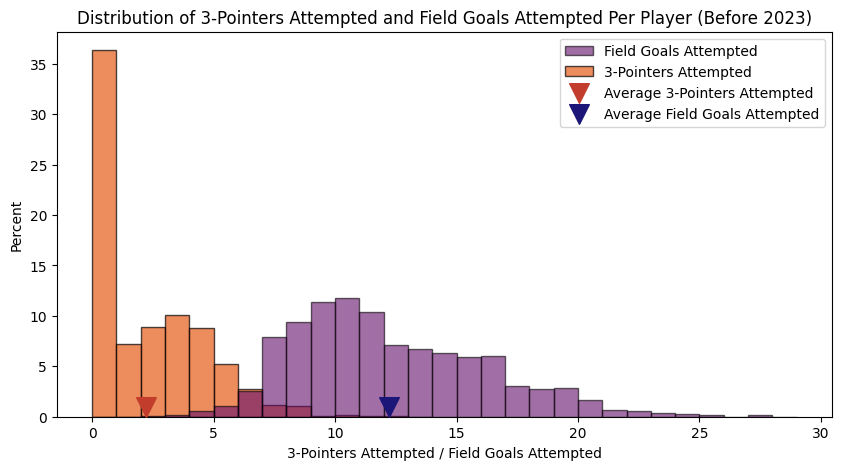

In [202]:
# This code cell produces two histograms for field goals attempted and 3-pointers attempted in the years except 2023

# change the figsize of the graph to make it look better
plt.figure(figsize = (10, 5))

# plot histograms for FGA and 3PA
plt.hist(graph1["fg_attempted"], bins = np.arange(0, 30, 1), color = (.39, .05, .42), weights = mults_3pa_fga, ec = 'black', alpha = 0.6, zorder = 2, label = "Field Goals Attempted")
plt.hist(graph1["attempted_3p"], bins = np.arange(0, 15, 1), color = (.9, .36, .098), alpha = 0.7, weights = mults_3pa_fga, ec = 'black', zorder = 1, label = "3-Pointers Attempted")

# Show the mean in years except for 2023 with a marker
plt.scatter(mean_3pa, 1, marker = 'v', color = (.76, .24, .17), zorder = 3, s = 200, label = "Average 3-Pointers Attempted")
plt.scatter(mean_fga, 1, marker = 'v', color = (.11, .086, .47), zorder = 3, s = 200, label = "Average Field Goals Attempted")

# plot the labels
plt.title("Distribution of 3-Pointers Attempted and Field Goals Attempted Per Player (Before 2023)")
plt.xlabel("3-Pointers Attempted / Field Goals Attempted")
plt.ylabel("Percent")
plt.legend();

The first distribution graph chosen is all years except 2023, which would be all years prior. The goal was to see if maybe the distribution for field goals attempted and 3-pointers attempted were different in the 2023 season relative to every other year. The most common range for 3-pointers attempted were about 0-5 and the most common range for field goals attempted were about 7-15. In this graph, the average 3-pointers attempted per player was 2.2 and the average field goals attempted per player was 12.2 This means that the gap between these averages is 10, which we will make use of in the next graph. It is worth noting that more than 1/3 of the 3-pointers attempted are in the range of 0-1, indicating that players might not be taking a lot of 3-pointers when looking at the years before 2023. The results show that players in earlier years attempted far less 3-pointers than players in the 2023 season. Furthermore, field goals attempted has a much wider range than 3-pointers attempted in these years. This could possibly mean that there are a significant number of 2-pointers taken because the range of 3-pointers and field goals attempted are not the same.


Next, this can be compared to how the data differs in the 2023 season.


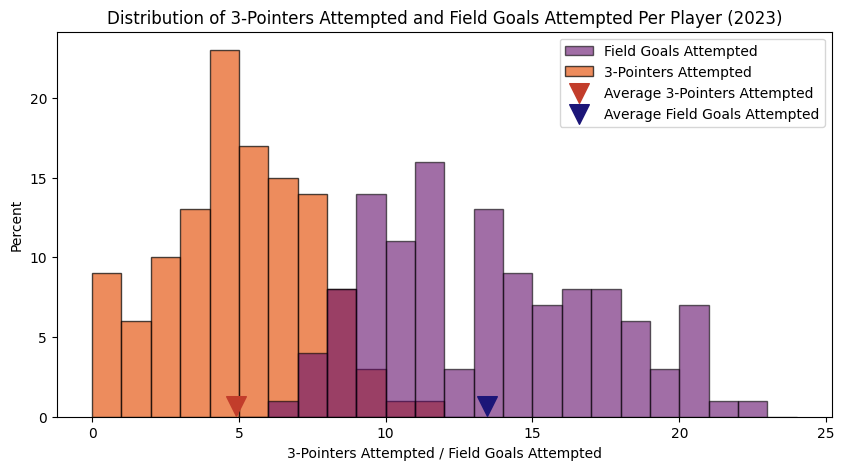

In [203]:
# This code cell produces two histograms for field goals attempted and 3-pointers attempted in the 2023 season

# change the figsize of the graph to make it look better
plt.figure(figsize = (10, 5))

# plot histograms for FGA and 3PA
plt.hist(graph1_2023["fg_attempted"], bins = np.arange(5, 25, 1), color = (.39, .05, .42), ec = 'black', alpha = 0.6, zorder = 2, label = "Field Goals Attempted")
plt.hist(graph1_2023["attempted_3p"], bins = np.arange(0, 14, 1), color = (.9, .36, .098), alpha = 0.7, ec = 'black', zorder = 1, label = "3-Pointers Attempted")

# Show the mean in 2023 with a marker
plt.scatter(mean_3pa_2023, .7, marker = 'v', color = (.76, .24, .17), zorder = 3, s = 200, label = "Average 3-Pointers Attempted")
plt.scatter(mean_fga_2023, .7, marker = 'v', color = (.11, .086, .47), zorder = 3, s = 200, label = "Average Field Goals Attempted")

# plot the labels
plt.title("Distribution of 3-Pointers Attempted and Field Goals Attempted Per Player (2023)")
plt.xlabel("3-Pointers Attempted / Field Goals Attempted")
plt.ylabel("Percent")
plt.legend();

This graph has the same format, but now for only the year 2023. It has a greater range of both 3-pointers attempted (3-8) and field goals attempted (8-19) compared to the graph without 2023. In 2023, the average 3-pointer attempts is 4.9, which is a drastic increase from the previous 2.2. Also, the average field goals attempted have also increased slightly from 12.2 to 13.4. It is worth noting that the gap between the variables has decreased to 8.5 from a previous 10. This time field goals attempted has only a slightly wider range than 3-pointers attempted. Both of these could possibly mean that a large portion of the shots attempted are 3-pointers.

Overall, the graph could possibly suggest that more players are attempting more 3-pointers and field goals per game in 2023 compared to the previous years. Further proof that 3-pointer attempts are increasing over time can be examined through studying 3-pointer attempts by position over the years.

### 3.2 -  Q: Are players shooting more 3-pointers per game over the years?

It is worth studying if 3-pointers attempted in the NBA is increasing, decreasing, or remaining the same over the years. We look at this information in a variety of different ways.

For each of the following SQL code in question 2, we found the average attempted 3-pointers and average points by position and year. We want to have 5 lines on the graph for each position. If multiple positions are accounted for (ex. PG-SG), we are checking for the primary position.

In [175]:
# get the average points per game and 3-pointers attempted with point guards for each year
sql_statement = """
              SELECT year, pos, AVG(attempted_3p) AS avg_attempted_3p, AVG(points) AS avg_points
              FROM nba
              WHERE pos LIKE 'PG%'
              GROUP BY year;
              """
graph2_pg = pd.read_sql_query(sql_statement, conn)
graph2_pg

,year,pos,avg_attempted_3p,avg_points
0,1970,PG,NaN,15.625000
1,1975,PG,NaN,14.057895
2,1980,PG,0.414286,13.214286
3,1985,PG,0.700000,13.168182
4,1990,PG,2.109091,16.331818
5,1995,PG,3.617391,14.130435
6,2000,PG,3.276190,15.133333
7,2005,PG,3.331034,14.817241
8,2010,PG,2.811538,14.323077
9,2015,PG,4.014815,16.192593


In [176]:
# get the average points per game and 3-pointers attempted with shooting guards for each year
sql_statement = """
              SELECT year, pos, AVG(attempted_3p) AS avg_attempted_3p, AVG(points) AS avg_points
              FROM nba
              WHERE pos LIKE 'SG%'
              GROUP BY year;
              """
graph2_sg = pd.read_sql_query(sql_statement, conn)
graph2_sg

,year,pos,avg_attempted_3p,avg_points
0,1970,SG,NaN,14.518519
1,1975,SG,NaN,14.378571
2,1980,SG,0.535714,16.467857
3,1985,SG,0.586207,14.879310
4,1990,SG,1.593103,16.565517
5,1995,SG,3.429032,14.609677
6,2000,SG,3.189655,15.227586
7,2005,SG,3.707407,16.337037
8,2010,SG,3.984000,15.188000
9,2015,SG,4.373077,15.846154


In [177]:
# get the average points per game and 3-pointers attempted with small forwards for each year
sql_statement = """
              SELECT year, pos, AVG(attempted_3p) AS avg_attempted_3p, AVG(points) AS avg_points
              FROM nba
              WHERE pos LIKE 'SF%'
              GROUP BY year;
              """
graph2_sf = pd.read_sql_query(sql_statement, conn)
graph2_sf

,year,pos,avg_attempted_3p,avg_points
0,1970,SF,NaN,14.716667
1,1975,SF,NaN,12.300000
2,1980,SF,0.150000,16.073333
3,1985,SF,0.339286,17.760714
4,1990,SF,1.000000,17.364286
5,1995,SF,3.235714,15.660714
6,2000,SF,2.418519,15.825926
7,2005,SF,2.720000,15.548000
8,2010,SF,3.486957,15.317391
9,2015,SF,4.646154,15.676923


In [178]:
# get the average points per game and 3-pointers attempted with power forwards for each year
sql_statement = """
              SELECT year, pos, AVG(attempted_3p) AS avg_attempted_3p, AVG(points) AS avg_points
              FROM nba
              WHERE pos LIKE 'PF%'
              GROUP BY year;
              """
graph2_pf = pd.read_sql_query(sql_statement, conn)
graph2_pf

,year,pos,avg_attempted_3p,avg_points
0,1970,PF,NaN,11.171429
1,1975,PF,NaN,11.568000
2,1980,PF,0.077273,13.163636
3,1985,PF,0.095238,14.061905
4,1990,PF,0.222727,15.531818
5,1995,PF,0.986364,15.345455
6,2000,PF,1.242857,15.382143
7,2005,PF,1.734483,15.265517
8,2010,PF,1.185185,14.903704
9,2015,PF,2.743478,13.878261


In [179]:
# get the average points per game and 3-pointers attempted with centers for each year
sql_statement = """
              SELECT year, pos, AVG(attempted_3p) AS avg_attempted_3p, AVG(points) AS avg_points
              FROM nba
              WHERE pos LIKE 'C%'
              GROUP BY year;
              """
graph2_c = pd.read_sql_query(sql_statement, conn)
graph2_c

,year,pos,avg_attempted_3p,avg_points
0,1970,C,NaN,13.514286
1,1975,C,NaN,13.577778
2,1980,C,0.021053,16.200000
3,1985,C,0.045000,15.850000
4,1990,C,0.226316,13.757895
5,1995,C,0.231250,16.568750
6,2000,C,0.166667,12.426667
7,2005,C,0.140000,13.220000
8,2010,C,0.252632,14.984211
9,2015,C,0.622222,15.711111


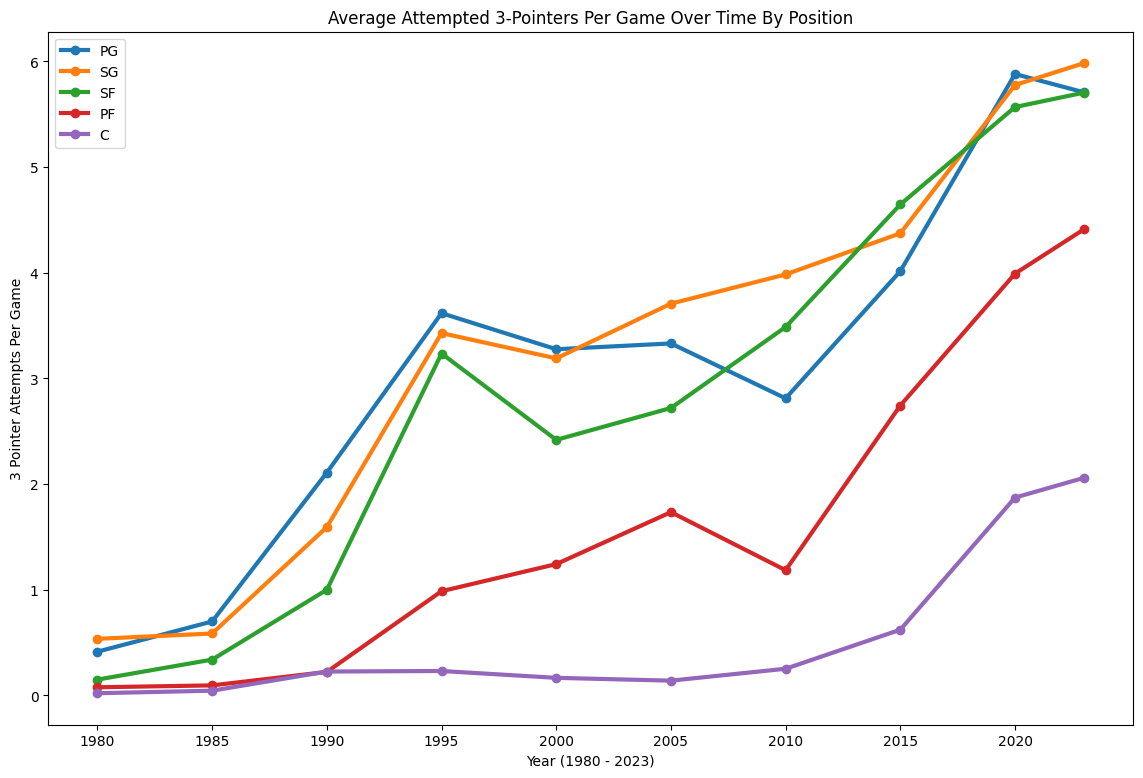

In [180]:
# this code cell produces 5 line graphs for each position and there average 3-pointers attempted over time

# Graph code
plt.figure(figsize = (14, 9))

# plot the year as x and avg_attempted_3p as y
plt.plot(graph2_pg["year"], graph2_pg["avg_attempted_3p"], label = 'PG', linewidth = 3, marker = 'o')
plt.plot(graph2_sg["year"], graph2_sg["avg_attempted_3p"], label = 'SG', linewidth = 3, marker = 'o')
plt.plot(graph2_sf["year"], graph2_sf["avg_attempted_3p"], label = 'SF', linewidth = 3, marker = 'o')
plt.plot(graph2_pf["year"], graph2_pf["avg_attempted_3p"], label = 'PF', linewidth = 3, marker = 'o')
plt.plot(graph2_c["year"], graph2_c["avg_attempted_3p"], label = 'C', linewidth = 3, marker = 'o')

# plot labels and title
plt.title("Average Attempted 3-Pointers Per Game Over Time By Position")
plt.xlabel("Year (1980 - 2023)")
plt.ylabel("3 Pointer Attempts Per Game")

# set years to go up by 5 starting from 1980 (since there is no data in the 70s for 3-pointers)
plt.xticks(np.arange(1980, 2021, 5))
plt.legend();

From the line graph, one could conclude that players could be shooting more three-pointers per game over the years. This is indicated by the overall positive slope between 3 point attempts per game over the years for each position. In 1980, each position averaged under 1 three-point attempt per game and in 2020 three positions (PG/SF/SG) averaged over 5.5 three-point attempts per game. A noticeable point about the graph is that 2015 to 2020 saw a big increase in three pointers for each position. It is worth mentioning that the “Center” position has remained mostly flat up until 2015.

The overall increase in 3-point attempts per game from 1980 to 2020 could suggest that players are more confident in making three-pointers. Also, perhaps game plans call for players to attempt more three-pointers. The constant jump of attempted three-pointers from 2015 to 2020 could possibly show a change in the overall league's view of attempting three-pointers. An interesting link to this data is that Steph Curry had a breakout and championship winning season in 2014/2015. Curry is a 4 time NBA champion, 2 time NBA MVP, and a known three-point shooter. This may suggest that the NBA caught on to how effective Curry’s three-pointers were for his team and perhaps encouraged their players to mimic this style of attempting more three-pointers. The flat position of “Center’s” may be attributed to the idea that their main goals are to win rebounds, dunk, screen, and block. Three-pointers are not part of their main purpose or skill set, so these players are not likely to attempt many if any three-pointers per game.

Next, the points per game will be compared over time by position.

Stats/Info about Steph Curry https://www.basketball-reference.com/players/c/curryst01.html

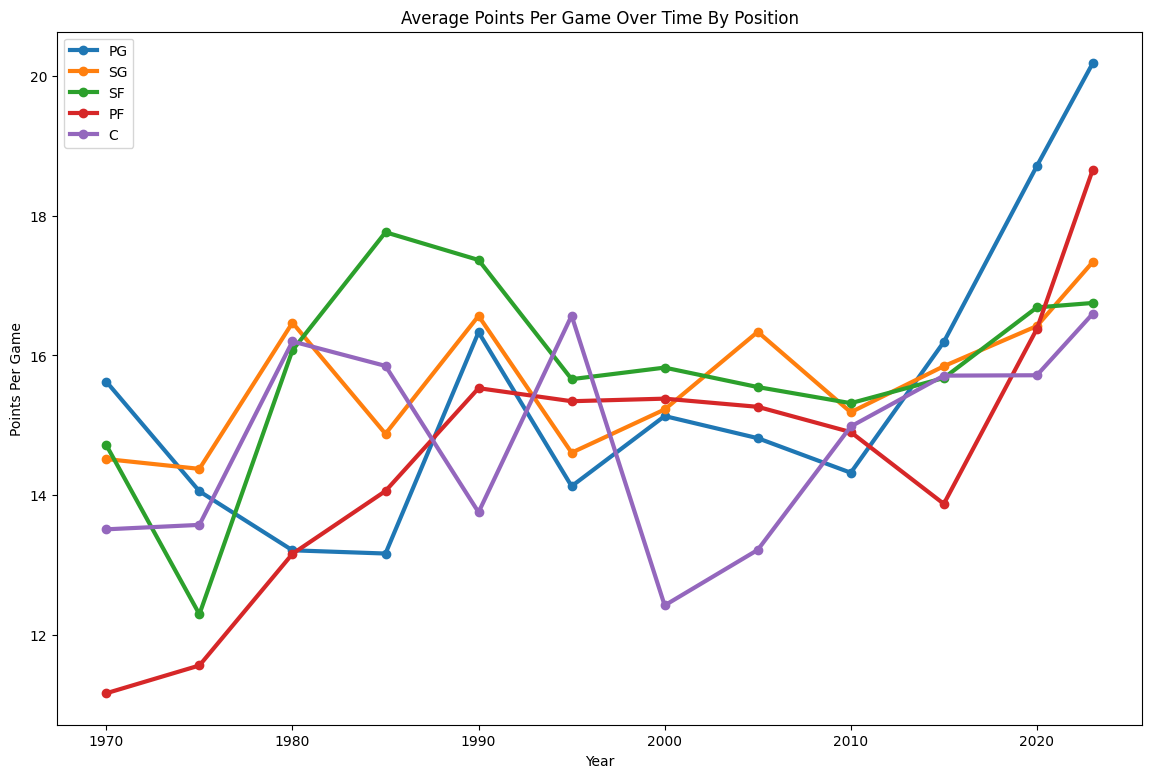

In [181]:
# this code cell produces 5 line graphs for each position and there average points per game over time

# set figure size
plt.figure(figsize=(14, 9))

# plot x as year and y as average points
plt.plot(graph2_pg["year"], graph2_pg["avg_points"], label = 'PG', linewidth = 3, marker = 'o')
plt.plot(graph2_sg["year"], graph2_sg["avg_points"], label = 'SG', linewidth = 3, marker = 'o')
plt.plot(graph2_sf["year"], graph2_sf["avg_points"], label = 'SF', linewidth = 3, marker = 'o')
plt.plot(graph2_pf["year"], graph2_pf["avg_points"], label = 'PF', linewidth = 3, marker = 'o')
plt.plot(graph2_c["year"], graph2_c["avg_points"], label = 'C', linewidth = 3, marker = 'o')

# plot labels and title
plt.title("Average Points Per Game Over Time By Position")
plt.xlabel("Year")
plt.ylabel("Points Per Game")
plt.legend();

Now the average points per game over time will be looked at. It is split by position, to see if a certain position is possibly scoring more than others in certain years. In the previous graph, the 3-pointer attempts per game peaked in the 2023 season, and in this graph, it does the same with most positions except for possibly small forwards in regards to points. This could mean that taking more 3-pointers results in more points. This isn't exactly obvious because a 3-pointer is a more difficult shot. So a player who isn't as good at shooting 3-pointers won't take them because they are hard to make, even though they are worth more points. Also regarding the previous graph, the 3-pointers attempted increased pretty quickly around 2010 and it sort of does the same with points per game except for the power forward position, which does this in 2015.

The rest of the data doesn't likely match up with our other findings, though it is worth noting that the three large outliers are small forwards in 1985 (17.76 points per game), power forwards in 1970 (11.17 points per game), and point guards in 2023 (20.18). While the first two don't align with any of our findings, point guards in 2023 and 2024 have the highest points per game output and 3-pointers attempted out of any position in all of our recorded years.

Since most of the positions peak in points per game in the 2023 season, it is worth finding if this pattern might continue in the current 2024 season.

For the following set of graphs, we first find the average 3-pointer attempts by position for the 2023 and 2024 season. Next, we look at this information with the leading scorers of the 2023 and 2024 season combined. Finally, we look at the points per game of the players that shot more 3-pointers in the 2023 season compared to the 2024 season.

In [182]:
# this code cell gets each position's average 3-pointers attempted for the 2023 season
sql_statement = """
              SELECT CASE
                         WHEN pos LIKE 'PG%' THEN 'PG'
                         WHEN pos LIKE 'SG%' THEN 'SG'
                         WHEN pos LIKE 'SF%' THEN 'SF'
                         WHEN pos LIKE 'PF%' THEN 'PF'
                         WHEN pos LIKE 'C%' THEN 'C'
                         ELSE 'Unlisted Position'
                     END position_2023,
                     AVG(attempted_3p) AS avg_attempted_3p
              FROM nba
              WHERE year = 2023
              GROUP BY position_2023
              """
pos_2023 = pd.read_sql_query(sql_statement, conn)
pos_2023

,position_2023,avg_attempted_3p
0,C,2.059091
1,PF,4.410526
2,PG,5.707692
3,SF,5.704167
4,SG,5.982759


In [183]:
# this code cell gets each position's average 3-pointers attempted for the 2024 season
sql_statement = """
              SELECT CASE
                         WHEN pos LIKE 'PG%' THEN 'PG'
                         WHEN pos LIKE 'SG%' THEN 'SG'
                         WHEN pos LIKE 'SF%' THEN 'SF'
                         WHEN pos LIKE 'PF%' THEN 'PF'
                         WHEN pos LIKE 'C%' THEN 'C'
                         ELSE 'Unlisted Position'
                     END position_2024,
                     AVG(attempted_3p) AS avg_attempted_3p
              FROM nba_2024
              GROUP BY position_2024
              """
pos_2024 = pd.read_sql_query(sql_statement, conn)
pos_2024

,position_2024,avg_attempted_3p
0,C,2.185714
1,PF,4.165217
2,PG,6.430769
3,SF,5.500000
4,SG,5.924000


In [184]:
# get the difference in average 3-pointers attempted for the 2023 season and 2024 season to use in the description
difference = abs(pos_2024["avg_attempted_3p"] - pos_2023["avg_attempted_3p"])
print(difference)

0    0.126623
1    0.245309
2    0.723077
3    0.204167
4    0.058759
Name: avg_attempted_3p, dtype: float64


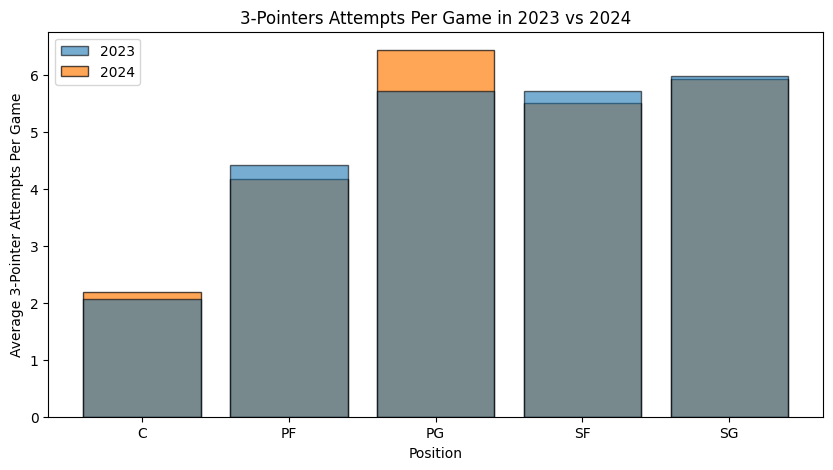

In [185]:
# this code cell prints 2 sets of bar graphs for the 2023 and 2024 seasons
# it gets the average 3-pointers attempted for each position

# set figure size
plt.figure(figsize=(10, 5))

# plot bar graph - x as 2023/2024 position and y as average 3-pointers attempted
plt.bar(pos_2023["position_2023"], pos_2023["avg_attempted_3p"], alpha = .6, label = "2023", zorder = 2, ec='black')
plt.bar(pos_2024["position_2024"], pos_2024["avg_attempted_3p"], alpha = .7, label = "2024", zorder = 1, ec='black')

# plot labels and title
plt.title("3-Pointers Attempts Per Game in 2023 vs 2024")
plt.ylabel("Average 3-Pointer Attempts Per Game")
plt.xlabel("Position")
plt.legend();

Now the 3-pointer attempts per game of each player in 2023 vs 2024 will be looked at. The point guard position is notably the highest difference (0.72) between 2023 and 2024, with 2024 being larger. All of the other positions have a difference of less than 0.25 3-pointer attempts per game, which isn't very significant. It is also worth noting that point guards take the most 3-pointers per game. This matches up to our findings in the previous graph, indicating that the best players in the NBA in terms of points per game could consist of a lot of point guards, since they shoot the most 3-pointers and have the highest points per game on average.

Next, we want to find this information with the NBA's leading scorers in these two seasons. By looking at the highest scoring players, we would like to see if 3-pointers could possibly lead to more success in the NBA.

In [186]:
# get the attempted 3-pointers of each player for both the 2023 and 2024 season
# get the points of each player for both 2023 and 2024
# get the combined 3-point attempts and the difference in 3-pointers for the seasons to use later
# order by the combined points to show the best players - we are choosing the top 15
sql_statement = """
                SELECT nba.player,
                       nba.pos,
                       nba.attempted_3p AS attempted_3p_2023,
                       nba_2024.attempted_3p AS attempted_3p_2024,
                       nba.points AS points_2023,
                       nba_2024.points AS points_2024,
                       nba.attempted_3p + nba_2024.attempted_3p AS combined_3p,
                       nba_2024.attempted_3p - nba.attempted_3p AS difference_3p
                FROM nba JOIN nba_2024 ON (nba.player = nba_2024.player)
                WHERE nba.year = 2023
                ORDER BY points_2023 + points_2024 DESC
                LIMIT 15
              """
nba_threes_2024 = pd.read_sql_query(sql_statement, conn)
nba_threes_2024

,player,pos,attempted_3p_2023,attempted_3p_2024,points_2023,points_2024,combined_3p,difference_3p
0,Luka Dončić,PG,8.2,10.6,32.4,33.9,18.8,2.4
1,Shai Gilgeous-Alexander,PG,2.5,3.6,31.4,30.1,6.1,1.1
2,Giannis Antetokounmpo,PF,2.7,1.7,31.1,30.4,4.4,-1.0
3,Jayson Tatum,SF,9.3,8.2,30.1,26.9,17.5,-1.1
4,Damian Lillard,PG,11.3,8.5,32.2,24.3,19.8,-2.8
5,Kyrie Irving,PG-SG,8.3,7.3,27.1,25.6,15.6,-1.0
6,Jalen Brunson,PG,4.7,6.8,24.0,28.7,11.5,2.1
7,De'Aaron Fox,PG,5.0,7.8,25.0,26.6,12.8,2.8
8,Nikola Jokić,C,2.2,2.9,24.5,26.4,5.1,0.7
9,Anthony Edwards,SG,7.3,6.7,24.6,25.9,14.0,-0.6


In [187]:
# find the number of point guards out of the top 15 players
num_pg = 0
for position in nba_threes_2024["pos"]:
  if(position == 'PG' or position == 'PG-SG'):
    num_pg += 1
print("Point Guards: " + str(num_pg) + " out of 15")

Point Guards: 6 out of 15


Total Difference in 3-Pointers Attempted: 3.899999999999996


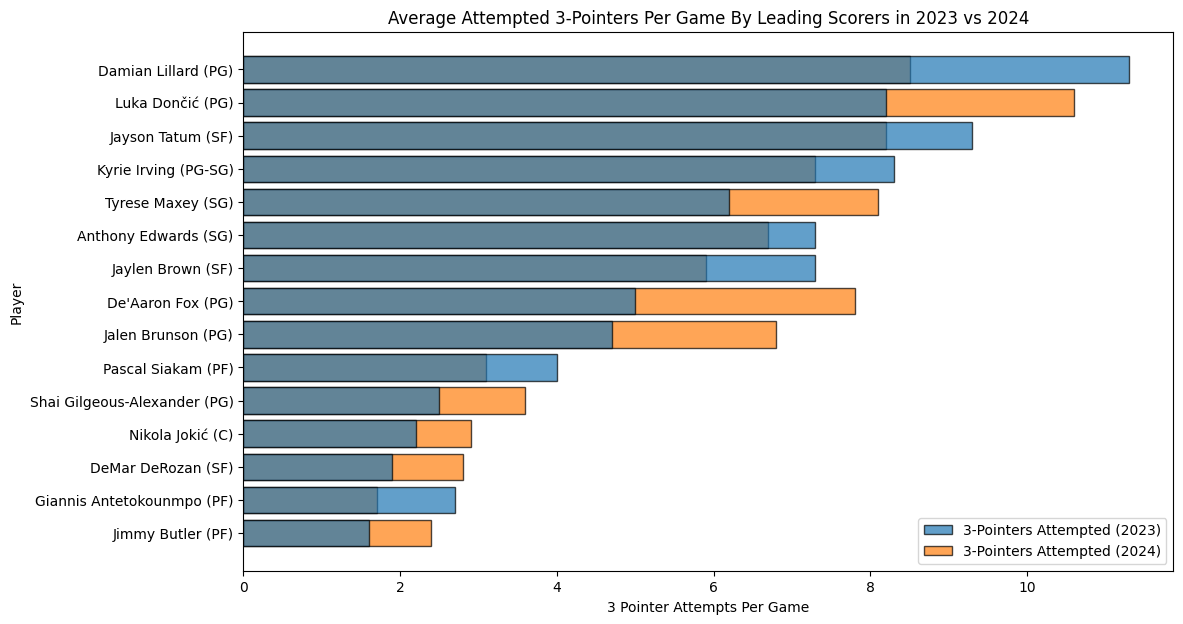

In [188]:
# this code cell produces 2 bar graphs that show the leading scorers for both the 2023 and 2024 season combined
# it also shows the 3-pointer attempts for each of these players and their respective positions

# set figure size
plt.figure(figsize = (12, 7))

# plot the player with their position as x and attempted_3p in 2023 vs 2024 as y (horizontal)
nba_threes_2024 = nba_threes_2024.sort_values(by='combined_3p', ascending=True)
plt.barh(nba_threes_2024["player"] + " (" + nba_threes_2024["pos"] + ")", nba_threes_2024["attempted_3p_2023"], zorder = 2, alpha = 0.7, label = "3-Pointers Attempted (2023)", ec='black')
plt.barh(nba_threes_2024["player"] + " (" + nba_threes_2024["pos"] + ")", nba_threes_2024["attempted_3p_2024"], zorder = 1, alpha = 0.7, label = "3-Pointers Attempted (2024)", ec='black')

# get the difference for each (2024 - 2023)
totDiff = 0
for diff in nba_threes_2024["difference_3p"]:
  totDiff += diff
print("Total Difference in 3-Pointers Attempted: " + str(totDiff))

# plot labels and title
plt.title("Average Attempted 3-Pointers Per Game By Leading Scorers in 2023 vs 2024")
plt.ylabel("Player")
plt.xlabel("3 Pointer Attempts Per Game")
plt.legend();

Now the average 3-pointers attempted per game by the leading scorers will be looked at. Based on our previous findings, it seems like players in modern NBA, specifically the last two seasons, could be scoring more and shooting 3-pointers more than ever. When looking at this graph, it seems like there is way more orange than blue, indicating that the leading scorers are shooting more in the 2024 season compared to the 2023 season, according to the data. The value of this was found to be 3.9, so these players shot a total of 3.9 more threes in the 2024 season than the 2023 season. This could mean that in the future, players might continue to shoot even more 3-pointers, since it works for the best scorers in the NBA.

Although most of the leading scorers shot more 3-pointers in the 2024 season, there are still a few players who shot more in the 2023 season. In the next graph, we look at what the result might have been of these players shooting less 3-pointers in the 2024 season.

In [189]:
# this code cell gets the leading scorers from the previous graph that shot more 3-pointers in the 2023 season
# limitting to 7 for this to get the player's that have more points in 2023 just from the last graph
sql_statement = """
                SELECT nba.player,
                       nba.attempted_3p AS attempted_3p_2023,
                       nba_2024.attempted_3p AS attempted_3p_2024,
                       nba.points AS points_2023,
                       nba_2024.points AS points_2024
                FROM nba JOIN nba_2024 ON (nba.player = nba_2024.player)
                WHERE nba.year = 2023 AND attempted_3p_2023 > attempted_3p_2024
                ORDER BY points_2023 + points_2024 DESC
                LIMIT 7
              """
nba_more_threes_2023 = pd.read_sql_query(sql_statement, conn)
nba_more_threes_2023

,player,attempted_3p_2023,attempted_3p_2024,points_2023,points_2024
0,Giannis Antetokounmpo,2.7,1.7,31.1,30.4
1,Jayson Tatum,9.3,8.2,30.1,26.9
2,Damian Lillard,11.3,8.5,32.2,24.3
3,Kyrie Irving,8.3,7.3,27.1,25.6
4,Anthony Edwards,7.3,6.7,24.6,25.9
5,Jaylen Brown,7.3,5.9,26.6,23.0
6,Pascal Siakam,4.0,3.1,24.2,21.7


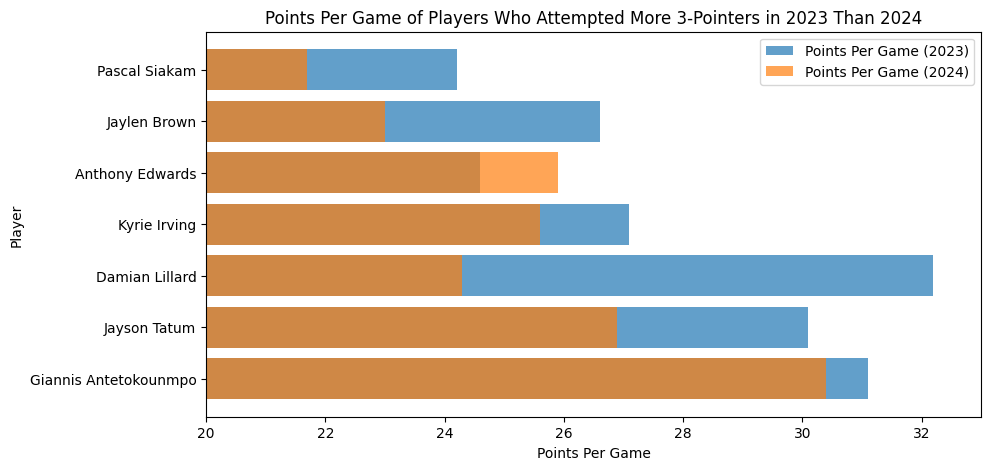

In [190]:
# this code cell looks at the leading scorers and their points per game that shot more 3-pointers in the 2023 season compared to the 2024 season

# set figure size
plt.figure(figsize = (10, 5))

# plot the player as x and points per game in 2023/2024 as y (horizontal)
plt.barh(nba_more_threes_2023["player"], nba_more_threes_2023["points_2023"], zorder = 1, alpha = 0.7, label = "Points Per Game (2023)")
plt.barh(nba_more_threes_2023["player"], nba_more_threes_2023["points_2024"], zorder = 2, alpha = 0.7, label = "Points Per Game (2024)")

# plot labels and title
plt.title("Points Per Game of Players Who Attempted More 3-Pointers in 2023 Than 2024")
plt.ylabel("Player")
plt.xlabel("Points Per Game")
plt.xlim(20, 33) # exaggerate the data
plt.legend();

Now the leading scorers who attempted more 3-pointers in the 2023 season than the 2024 season will be looked at. We wanted to see these players points per game in both seasons to conclude that maybe less 3-pointers taken leads to less point per game.

When looking at this graph, all of the players listed score less points per game in the 2024 season compared to the 2023 season except for Anthony Edwards, who is known to be effective taking 2-pointers. A pretty significant outlier in terms of the gap between points per game for both seasons in this graph is Damian Lillard. There is a drastic decrease in points per game in the transition from the 2023 season to the 2024 season, which is the same for 3-pointers attempted in the previous graph.

From these set of graphs, the data appears to suggest that players are shooting more 3-pointers over the years not only as a whole group but in all their respective positions. In addition, the data could suggest that the best players in the NBA, the ones that score the most points per game, shoot more 3-pointers. Furthermore, the data shows that players in the NBA in the past 2 years could be scoring more points per game as a reuslt of their large 3-pointers taken.

### 3.3 -  Q: How does effective field goal percentage relate to 3-pointers?

In the NBA, effective field goal percentage is a stat that is calculated by the following formula from nba.com:

(Field Goals Made + 0.5 * 3-Pointers Made) / Field Goals Attempted.

Effective field goal percentage takes 3-pointers and 2-pointers into account. If a player has a high 3-point percentage, they will have a high effective field goal percentage so long as their 2-point percentage doesn't weigh them down. This is because 3-pointers are worth more so they are going to weigh in to the effective field goal percentage more than 2-pointers.

We want to see the relation that 3-pointers have in this formula and also how 2-pointers are incorporated.

We also want to graph the data for each decade to see if that changes the correlation.

Reference: https://www.nba.com/bucks/features/boeder-120917

1970s: nan
1980s: -0.011585070532140496 (very weak negative linear relationship)
1990s: 0.26041533291318586 (very weak negative linear relationship)
2000s: 0.27835772458716934 (very weak negative linear relationship)
2010s: 0.03040466245683219 (very weak negative linear relationship)
2020s: -0.11937134936315993 (very weak negative linear relationship)


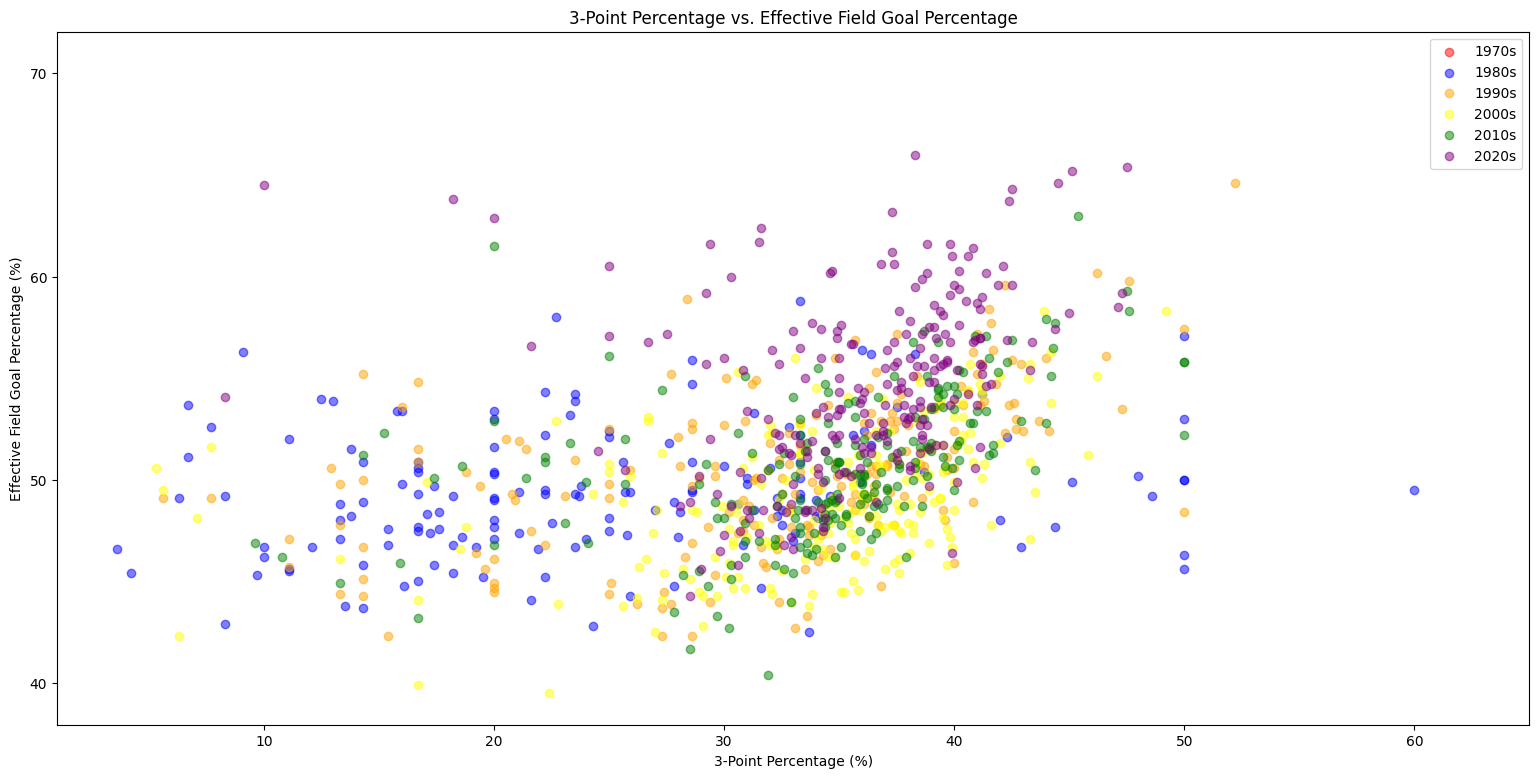

In [201]:
# this code goes through all the decades and creates a dataframe for each one then plots the 3-point percentage and effective field goal percentage for each decade

plt.figure(figsize=(19,9))

# list of colors to correspond with decade color
colors = ['red', 'blue', 'orange', 'yellow', 'green', 'purple']
i = 0 # counter

# loop through all decades
for decade in [197, 198, 199, 200, 201, 202]:
  # get the corresponding decade with / 10
  sql_statement = f"""
              SELECT *
              FROM nba
              WHERE year / 10 = {decade}
              """

  graph = pd.read_sql_query(sql_statement, conn)
  # plot perc_3p with effective_fg_perc
  # we multiply both x and y values by 100 since the graph looks nicer in percentages than in decimals
  plt.scatter(graph['perc_3p']*100, graph['effective_fg_perc']*100, color = colors[i], alpha = .5, label = str(decade) + "0s")

  # get correlation to use for later and print
  correlation = graph["effective_fg_perc"].corr(graph["perc_3p"])
  if(i > 0):
    print(str(decade) + "0s: " + str(correlation) + " (very weak negative linear relationship)")
  else:
    print(str(decade) + "0s: " + str(correlation))
  i += 1

# set the ticks to account for the adjusted percentages
plt.xticks(np.arange(0, 61, 10))
plt.yticks(np.arange(40, 71, 10))
# get rid of the percentages that are between 0-1 because it created a vertical bar of points (looks ugly)
plt.xlim(1, 65)

# plot labels, title, and legend
plt.xlabel('3-Point Percentage (%)')
plt.ylabel('Effective Field Goal Percentage (%)')
plt.title('3-Point Percentage vs. Effective Field Goal Percentage')
plt.legend();

This graph looks at 3-point percentage and effective field goal percentage for each decade. The scatter plot shows that the data is mostly clumped between 30% and 40% for three-point percentages. While most of the data can be found in this range, it has a large overall range and it is spread out to each end (about 0-60 since some data was removed). Also, the 1980’s seem to have the closest correlation to 0. While, the decades 1990’s, 2000’s, 2010’s, and 2020’s seem to maybe have more of a positive correlation.

The possible positive correlation between the years 1990’s, 2000’s, 2010’s, and 2020’s could perhaps suggest that having a higher 3-point percentage will allow for a higher effective field goal percentage. Above we calculated the correlation coefficient for each decade and the result for the 2020's was negative (-0.12). While the correlation seemingly increases from the graph, the correlation coefficient could be negative due to the outliers. A possible example of this is a center who has a low 3-point percentage, but they are effective from inside the 3-point line.

Next, the effectiveness of 2-pointers and 3-pointers will be looked at for two decades in the 20th century and two decades in the 21st century. This is done to see if possibly players are becoming more effective from the 3-point line.

In [192]:
# this code cell gets the number of 3-point percentages in the 70's that are not null
sql_statement = """
              SELECT COUNT(*)
              FROM nba
              WHERE perc_3p IS NOT NULL AND (year = 1970 OR year = 1975)
              """
graph3_1970s = pd.read_sql_query(sql_statement, conn)
graph3_1970s

,COUNT(*)
0,0


In [193]:
# get the effective field goal and 3-point percentages as well as 2-pointers and 3-pointers attempted for the 80s
sql_statement = """
              SELECT effective_fg_perc, perc_3p, attempted_2p, attempted_3p
              FROM nba
              WHERE year = 1980 OR year = 1985;
              """
graph3_1980s = pd.read_sql_query(sql_statement, conn)
graph3_1980s

,effective_fg_perc,perc_3p,attempted_2p,attempted_3p
0,0.559,0.286,20.3,0.1
1,0.522,0.333,19.3,0.0
2,0.494,0.257,20.7,0.4
3,0.574,0.000,18.2,0.0
4,0.509,0.256,18.3,0.5
...,...,...,...,...
235,0.492,0.486,7.1,0.5
236,0.571,0.500,5.7,0.0
237,0.478,0.325,6.3,1.0
238,0.490,0.340,7.0,0.6


In [194]:
# get the effective field goal and 3-point percentages as well as 2-pointers and 3-pointers attempted for the 90s
sql_statement = """
              SELECT effective_fg_perc, perc_3p, attempted_2p, attempted_3p
              FROM nba
              WHERE year = 1990 OR year = 1995;
              """
graph3_1990s = pd.read_sql_query(sql_statement, conn)
graph3_1990s

,effective_fg_perc,perc_3p,attempted_2p,attempted_3p
0,0.547,0.312,21.3,1.1
1,0.528,0.286,19.4,0.2
2,0.475,0.216,23.0,0.6
3,0.589,0.284,15.1,2.3
4,0.514,0.000,20.2,0.1
...,...,...,...,...
235,0.505,0.259,7.9,0.3
236,0.646,0.522,2.8,3.2
237,0.480,0.396,5.7,2.5
238,0.501,0.314,4.7,2.8


In [195]:
# get the effective field goal and 3-point percentages as well as 2-pointers and 3-pointers attempted for the 2000s
sql_statement = """
              SELECT effective_fg_perc, perc_3p, attempted_2p, attempted_3p
              FROM nba
              WHERE year = 2000 OR year = 2005;
              """
graph3_2000s = pd.read_sql_query(sql_statement, conn)
graph3_2000s

,effective_fg_perc,perc_3p,attempted_2p,attempted_3p
0,0.447,0.320,21.2,4.3
1,0.445,0.351,18.2,5.9
2,0.572,0.000,19.2,0.0
3,0.484,0.305,19.3,2.9
4,0.509,0.408,16.8,5.3
...,...,...,...,...
235,0.538,0.404,3.4,3.9
236,0.493,0.361,4.0,3.9
237,0.479,0.380,4.9,3.1
238,0.493,0.360,3.5,3.8


In [196]:
# get the effective field goal and 3-point percentages as well as 2-pointers and 3-pointers attempted for the 2010s
# order by and show player in this one to show the player with the highest 3-pointers attempted
sql_statement = """
              SELECT player, effective_fg_perc, perc_3p, attempted_2p, attempted_3p
              FROM nba
              WHERE year = 2010 OR year = 2015
              ORDER BY attempted_3p DESC
              """
graph3_2010s = pd.read_sql_query(sql_statement, conn)
graph3_2010s

,player,effective_fg_perc,perc_3p,attempted_2p,attempted_3p
0,Stephen Curry,0.630,0.454,9.0,11.2
1,Damian Lillard,0.497,0.375,11.5,8.1
2,Klay Thompson,0.569,0.425,9.2,8.1
3,James Harden,0.512,0.359,11.7,8.0
4,Robert Covington,0.504,0.353,3.4,7.2
...,...,...,...,...,...
235,Jonas Valančiūnas,0.565,NaN,8.9,0.0
236,DeAndre Jordan,0.703,0.000,6.6,0.0
237,Kenneth Faried,0.558,0.500,9.3,0.0
238,Nerlens Noel,0.522,0.500,8.7,0.0


In [197]:
# get the effective field goal and 3-point percentages as well as 2-pointers and 3-pointers attempted for the 2020s
sql_statement = """
              SELECT effective_fg_perc, perc_3p, attempted_2p, attempted_3p
              FROM nba
              WHERE year = 2020 OR year = 2023;
              """
graph3_2020s = pd.read_sql_query(sql_statement, conn)
graph3_2020s

,effective_fg_perc,perc_3p,attempted_2p,attempted_3p
0,0.605,0.421,9.0,12.7
1,0.532,0.349,16.8,6.2
2,0.554,0.391,9.4,10.5
3,0.545,0.377,14.6,3.0
4,0.600,0.303,14.4,3.6
...,...,...,...,...
235,0.513,0.364,5.2,4.7
236,0.637,0.424,2.7,5.2
237,0.569,0.423,4.1,4.2
238,0.502,0.289,6.0,3.6


AVG 80s 3-Pointers: 0.3129166666666668
AVG 90s 3-Pointers: 1.8137499999999993
AVG 80s 2-Pointers: 11.784166666666659
AVG 90s 2-Pointers: 10.57083333333333
AVG 80s EFG%: 0.5001124999999998
AVG 90s EFG%: 0.5051375000000001


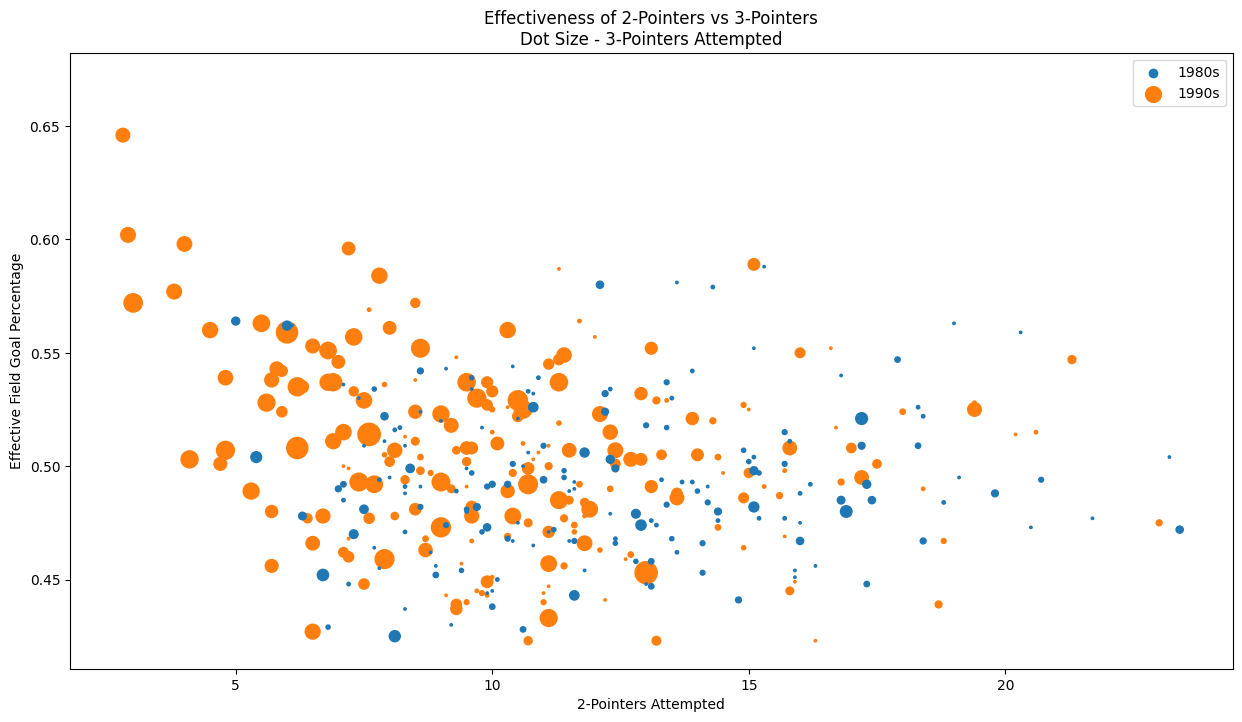

In [198]:
# this code cell produces 2 scatter plots for the effectiveness of 2-pointers and 3-pointers in the 80s and 90s

# set figure size
plt.figure(figsize=(15, 8))

# plot 2-pointers attempted as x, effective field goal percentage as y, and 3-pointers attempted as the size
# multiply the size by 30 to see the dots easier
plt.scatter(graph3_1980s["attempted_2p"], graph3_1980s["effective_fg_perc"], s = graph3_1980s["attempted_3p"] * 30, label = '1980s', zorder = 2)
plt.scatter(graph3_1990s["attempted_2p"], graph3_1990s["effective_fg_perc"], s = graph3_1990s["attempted_3p"] * 30, label = '1990s', zorder = 1)

# use this for conclusion - gets all 3 variables' average
avg_3p_80 = sum(graph3_1980s["attempted_3p"]) / len(graph3_1980s["attempted_3p"])
avg_3p_90 = sum(graph3_1990s["attempted_3p"]) / len(graph3_1990s["attempted_3p"])
print("AVG 80s 3-Pointers: " + str(avg_3p_80))
print("AVG 90s 3-Pointers: " + str(avg_3p_90))
avg_2p_80 = sum(graph3_1980s["attempted_2p"]) / len(graph3_1980s["attempted_2p"])
avg_2p_90 = sum(graph3_1990s["attempted_2p"]) / len(graph3_1990s["attempted_2p"])
print("AVG 80s 2-Pointers: " + str(avg_2p_80))
print("AVG 90s 2-Pointers: " + str(avg_2p_90))
avg_eff_80 = sum(graph3_1980s["effective_fg_perc"]) / len(graph3_1980s["effective_fg_perc"])
avg_eff_90 = sum(graph3_1990s["effective_fg_perc"]) / len(graph3_1990s["effective_fg_perc"])
print("AVG 80s EFG%: " + str(avg_eff_80))
print("AVG 90s EFG%: " + str(avg_eff_90))

# plot labels and title
plt.title("Effectiveness of 2-Pointers vs 3-Pointers\nDot Size - 3-Pointers Attempted")
plt.xlabel("2-Pointers Attempted")
plt.ylabel("Effective Field Goal Percentage")
plt.legend();

There is a pattern of low to high correlation from the 1980’s to the 1990’s and high to low correlation from the 2000’s to the 2010’s. Due to this low to high and high to low surge of correlation within one decade, it was of interest to examine why this is. To do this the next two graphs compare the number of 2-pointers and 3-pointers attempted to the effective field goal percentage. Both 2-pointers and 3-pointers makeup the field goal percentage, so this is why these two variables are worth studying. The first graph is 1980’s and 1990’s and the second graph is 2000’s to 2010’s.

The graph compares the relationship of 2-pointers and 3-pointers between effective field goal percentages for the 1980’s and 1990’s. In the 1980’s, players took an average of 11.78 2-point attempts per game and in the 1990’s players took an average of 10.57 2-point attempts per game, which is slightly less. The 1980’s have an effective field goal percentage of 0.500 and the 1990’s have an effective field goal percentage of 0.505, which is practically no difference. The 1980’s had an average of 0.31 3-pointers attempted and the 1990’s had an average of 1.81 3-pointers attempted, which is significantly higher. Even though players were taking more 3-pointers in the 1990’s, it was not any more effective.


AVG 10s 3-Pointers: 2.9454166666666666
AVG 20s 3-Pointers: 4.858750000000003
AVG 10s 2-Pointers: 9.186250000000003
AVG 20s 2-Pointers: 8.339583333333328
AVG 10s EFG%: 0.510158333333333
AVG 20s EFG%: 0.5491291666666668


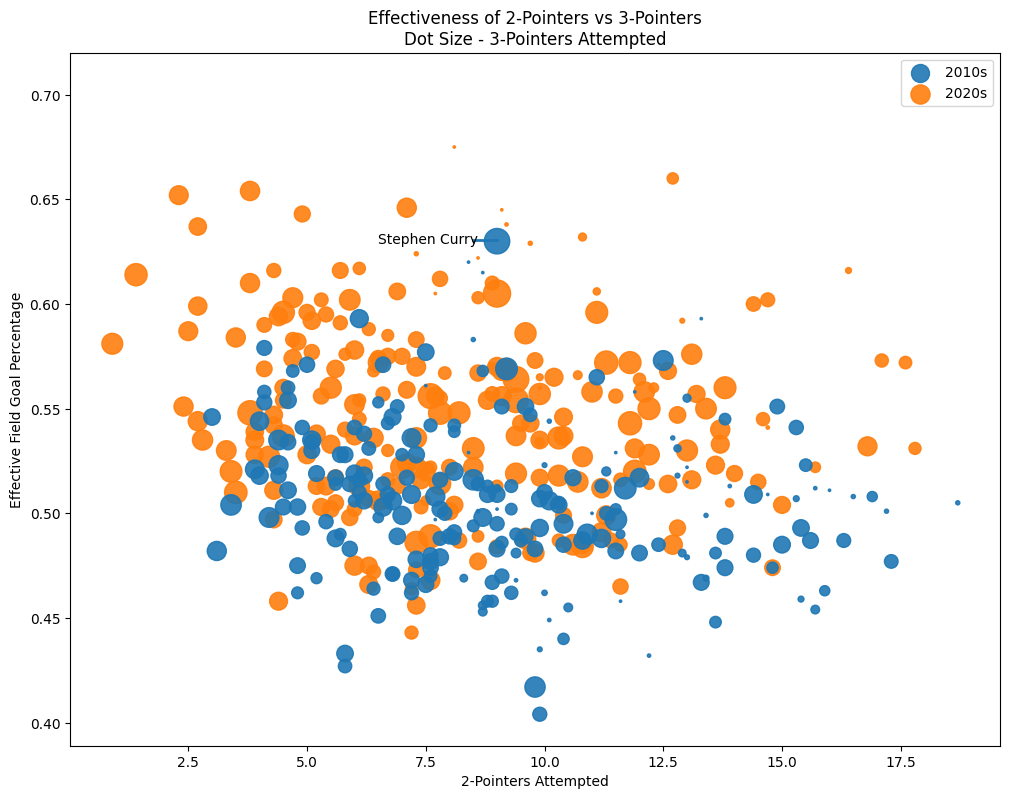

In [199]:
# this code cell produces 2 scatter plots for the effectiveness of 2-pointers and 3-pointers in the 2010s and 2020s

# set figure size
plt.figure(figsize=(12, 9))

# plot 2-pointers attempted as x, effective field goal percentage as y, and 3-pointers attempted as the size
# multiply the size by 30 to see the dots easier
plt.scatter(graph3_2010s["attempted_2p"], graph3_2010s["effective_fg_perc"], s = graph3_2010s["attempted_3p"] * 30, label = '2010s', zorder = 2, alpha = .9)
plt.scatter(graph3_2020s["attempted_2p"], graph3_2020s["effective_fg_perc"], s = graph3_2020s["attempted_3p"] * 30, label = '2020s', zorder = 1, alpha = .9)
plt.text(6.5, .629, graph3_2010s["player"][0])
plt.plot([8.5, 9], [.6305, .6305], lw=2, zorder = -1) # looked at documentation to plot a separate line with x1, x2, y1, y2

# use this for conclusion - gets all 3 variables' average
avg_3p_10 = sum(graph3_2010s["attempted_3p"]) / len(graph3_2010s["attempted_3p"])
avg_3p_20 = sum(graph3_2020s["attempted_3p"]) / len(graph3_2020s["attempted_3p"])
print("AVG 10s 3-Pointers: " + str(avg_3p_10))
print("AVG 20s 3-Pointers: " + str(avg_3p_20))
avg_2p_10 = sum(graph3_2010s["attempted_2p"]) / len(graph3_2010s["attempted_2p"])
avg_2p_20 = sum(graph3_2020s["attempted_2p"]) / len(graph3_2020s["attempted_2p"])
print("AVG 10s 2-Pointers: " + str(avg_2p_10))
print("AVG 20s 2-Pointers: " + str(avg_2p_20))
avg_eff_10 = sum(graph3_2010s["effective_fg_perc"]) / len(graph3_2010s["effective_fg_perc"])
avg_eff_20 = sum(graph3_2020s["effective_fg_perc"]) / len(graph3_2020s["effective_fg_perc"])
print("AVG 10s EFG%: " + str(avg_eff_10))
print("AVG 20s EFG%: " + str(avg_eff_20))

# plot labels and title
plt.title("Effectiveness of 2-Pointers vs 3-Pointers\nDot Size - 3-Pointers Attempted")
plt.xlabel("2-Pointers Attempted")
plt.ylabel("Effective Field Goal Percentage")
plt.legend();

Reviewing the 2010’s to 2020’s will provide insight into whether it follows a similar pattern to the 1980’s and 1990’s graph.

The graph shows that the 2010’s had an average of 2.95 3-pointers attempted and the 2020’s had 4.86 3-pointers attempted per game, which is significantly higher. The 2010’s had an average of 9.19 2-pointers attempted and the 2020’s had an average of 8.34 2-pointers attempted, which is close. The 2010’s had an average effective field goal percentage of 0.51 and the 2020’s had an average field goal percentage of 0.55, which is pretty close. However, this difference is higher than the difference in the 1980's and 1990's, indicating that this trend could possibly continue in future decades. Also, the 2010's have a pretty big outlier which is shown on the graph. This outlier is Stephen Curry, who was mentioned before as being known for his remarkable 3-point shooting. Not only does he shoot a high number of 3-pointers, but he also is effective with them. Because of this outlier, we could see a higher average effective field goal percentage in the 2010's than what should be shown. This data indicates the same conclusion that attempting more 3-pointers does not make the players any more effective.


# Conclusion



We found that in the 2023 season, most players shot about 3-8 3-pointers per game and attempted about 8-19 field goals per game. However in the years before 2023, most players only shot about 0-5 3-pointers per game and attempted only about 7-15 field goals per game.

We also found that players are shooting more 3-pointers per game over the years.

Finally, we found that 3-pointers are slightly more effective in recent years and it's possible that we see this trend continue in the future.

If we had more time, another question we would ask is what happened with the addition of the 3-point line? While we spent a lot of time looking at the more recent years in the NBA and how they differ from prior years as a whole, it would be interesting to find out how important the 3-point line was to the NBA when it was first introduced. This alone could double the size of our project because we could kind of repeat the same process but put our focus onto the years right after the 3-point line was added.